
## DAV 6150 -  Module 8 Assignemnt:

**Group Members:** Lucia Shumba, Chidochashe Makanga, Bekithemba Nkomo,  Alwyn Munatsi  
**Deliverables:** Jupyter notebook (code + narrative)

---
### Contents
1. Introduction  
2. Exploratory Data Analysis (EDA)  
3. Data Preparation (cleaning + feature engineering)  
4. Post‑Prep EDA (sanity checks)  
5. Regression Modeling (KNN & SVM) + Coefficient Interpretation  
6. Model Selection (cross‑validation, preferred model)   
7. Conclusions


# 1. Introduction
## Business Context and Domain Knowledge

The insurance industry operates in a highly competitive environment where maintaining and expanding relationships with existing customers is essential for sustainable growth. Unlike acquiring new customers, cross-selling—offering additional products to current clients, allows insurance firms to increase customer lifetime value while reducing marketing and acquisition costs.

For example:

*   A customer with home insurance might be offered auto or life insurance.
*   A customer with auto insurance could be targeted for roadside assistance or extended warranty products.

Understanding which customers are most likely to purchase an additional insurance product can help companies optimize marketing campaigns, allocate resources efficiently, and improve retention rates.

## Problem Statement

For the Module 7 Assignment, a binary classification model (Logistic Regression) was developed to predict whether a customer (TARGET) will buy a new insurance product, using features describing customer demographics, loyalty level, product purchase history, and financial behavior.

For this Module 8 Assignment, the task is to revisit this problem and develop an additional suite of classification models using **K-Nearest Neighbors (KNN)** and **Support Vector Machines (SVM)** to determine if these models can more effectively predict whether a customer (TARGET) will buy a new insurance product compared to the binary logistic regression model from Module 7. The insurance company plans to use the output of the best performing model to improve its customer retention and sales practices.

## Dataset Description

The dataset (sourced from Kaggle: Insurance Company Dataset - https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv) contains over 14,000 records, each representing a customer. Key features include:

*   TARGET (Purchased new product (0 = No, 1 = Yes), Binary, Response variable)
*   Loyalty (Loyalty level (0–3, 99 = unclassified), Categorical, Treat 99 as missing/unclassified)
*   Age, Age\_p (Customer and partner age, Numerical Continuous)
*   City (City code Categorical (even if numeric) High cardinality)
*   LOR, LOR\_m (Length of relationship (years/months), Numerical Continuous but correlated)
*   Prod\_A, Prod\_B (Whether the customer bought product A or B, Binary, Categorical)
*   Type\_A, Type\_B, Contract (Type/category of products or contracts, Categorical)
*   Turnover\_A, Turnover\_B (Amount spent on product A and B, Numerical Continuous Approach)

The project will follow these structured steps:

#### 1. Exploratory Data Analysis (EDA):
*   Univariate and bivariate analysis.
*   Identify missing values, outliers, and data distributions.
*   Detect categorical vs. continuous features.

#### 2. Data Preparation:

*   Handle missing or unclassified values.
*   Encode categorical variables.
*   Scale/normalize continuous variables.

#### 3. Feature Selection:

*   Correlation analysis, variance thresholds, and model-based selection.

#### 4. Model Development:

*   Construct at least two different KNN models and at least two different SVM models using different combinations of explanatory variables and appropriate transformations.
*   Perform hyperparameter tuning for the KNN (selecting optimal K) and SVM models (selecting optimal hyperparameters and kernel functions) using cross-validation.

#### 5. Model Evaluation:

*   Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
*   Evaluate model performance using stratified k-fold cross-validation.
*   Select the best performing model based on the evaluation metrics and criteria, comparing it to the Logistic Regression model from Module 7.
*   Apply the preferred model to the testing subset and discuss its performance.

#### 6. Conclusions:

*   Summarize key findings and actionable business insights.
*   Compare the performance of the preferred model from this assignment (Module 8) to the preferred Logistic Regression model from the Module 7 Assignment.


## 2) Exploratory Data Analysis
We check integrity (shape, missingness, duplicates), the distribution of the target (`dropout_cnt`), and basic subgroup composition.

In [1]:
# Import Necessary Libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For creating static visualizations
import seaborn as sns # For creating statistical visualizations
import plotly.express as px # For creating interactive visualizations
import plotly.graph_objects as go # For creating more complex interactive visualizations
from scipy.stats import chi2_contingency # For performing chi-squared tests
import statsmodels.api as sm # For statistical modeling
from sklearn.model_selection import cross_val_score # For evaluating model performance using cross-validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # For evaluating classification model performance
from sklearn.model_selection import StratifiedKFold # For performing stratified k-fold cross-validation
from scipy.stats import mannwhitneyu # For performing Mann-Whitney U tests
import warnings # To manage warnings
warnings.filterwarnings('ignore') # To ignore warnings 

In [2]:
# Load dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/bnkomo-creator/DAV-6150/refs/heads/main/M7_Data.csv")

In [3]:
# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Print the number of rows in a formatted way
print(f"Number of rows: {df.shape[0]:,}")

# Print the number of columns 
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame to get a glimpse of the data
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nDataset info:")
display(df.info())

Dataset shape: (14016, 15)
Number of rows: 14,016
Number of columns: 15

First 5 rows of the dataset:


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


None

Based on this initial exploration, we can observe the following about the dataset:

*   **Shape:** The dataset has 14,016 rows and 15 columns.
*   **First 5 Rows:** The head of the DataFrame shows the first few entries, giving us a preview of the data structure and the types of values present in each column, including `TARGET`, `loyalty`, `ID`, `age`, `city`, `LOR`, `prod_A`, `type_A`, `type_B`, `prod_B`, `turnover_A`, `turnover_B`, `contract`, `age_P`, and `lor_M`.
*   **Dataset Info:** The `df.info()` output provides a summary of the DataFrame's structure:
    *   There are 14,016 entries in total.
    *   The columns have varying data types, including `object` (for `TARGET`), `int64` (for most columns), and `float64` (for `turnover_A` and `turnover_B`).
    *   All columns have 14016 non-null entries, indicating that there are no missing values in this initial view of the data.

This initial look confirms the dimensions of the dataset and provides an overview of the data types and completeness of each column.

In [4]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check if there are any missing values
print("Missing values:", df.isna().sum().sum())

Duplicate rows: 3008
Missing values: 0


*   **Duplicate Rows:** There are 3008 duplicate rows in the dataset. These duplicate entries should be investigated and handled appropriately depending on the context of the data.
*   **Missing Values:** There are no missing values in the dataset as indicated by the total count of 0.

This initial check highlights the presence of a significant number of duplicate rows which will need to be addressed in the data preparation phase, while confirming that there are no missing values that require imputation or removal at this stage.

In [5]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print("Duplicate rows after removal:", df.duplicated().sum())

# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

Duplicate rows after removal: 0
Dataset shape: (11008, 15)


This code removes the duplicate rows from the DataFrame. The output shows that after removing duplicates, there are no longer any duplicate rows, and the shape of the DataFrame has been reduced from 14,016 rows to 11,008 rows. This means 3008 duplicate rows were successfully removed.

## 2.1 Univariate Analysis




Value counts for '     TARGET':


TARGET
N    8000
Y    3008
Name: count, dtype: int64

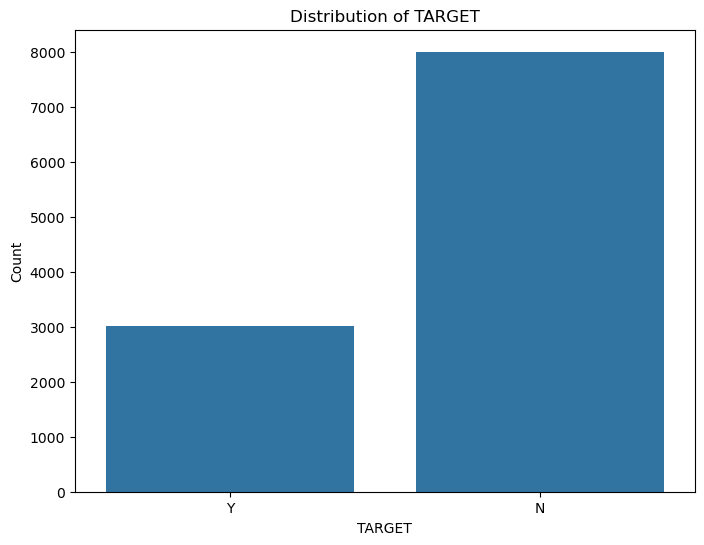

In [6]:
# EDA for report        TARGET
print("\nValue counts for '     TARGET':") # Print a header for the value counts
display(df['TARGET'].value_counts()) # Display the value counts of the 'TARGET' column

#Visualize the distribution of aggregation index
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df, x='TARGET') # Create a countplot of the 'TARGET' column
plt.title('Distribution of TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the analysis of the **TARGET** column:

*   **Value Counts:** The dataset contains two unique values for the TARGET variable: 'N' and 'Y'. 'N' appears 8000 times, and 'Y' appears 3008 times.
*   **Summary Statistics:** The TARGET column is of object type and has 11008 non-null entries. There are two unique values, with 'N' being the most frequent (8000 times).
*   **Distribution:** The countplot visually represents the distribution, showing that there are more instances of 'N' than 'Y' in the dataset.

This indicates that 'N' is the majority class in this dataset.


Value counts for 'loyalty':


loyalty
99    5048
3     2701
1     2019
2     1184
0       56
Name: count, dtype: int64

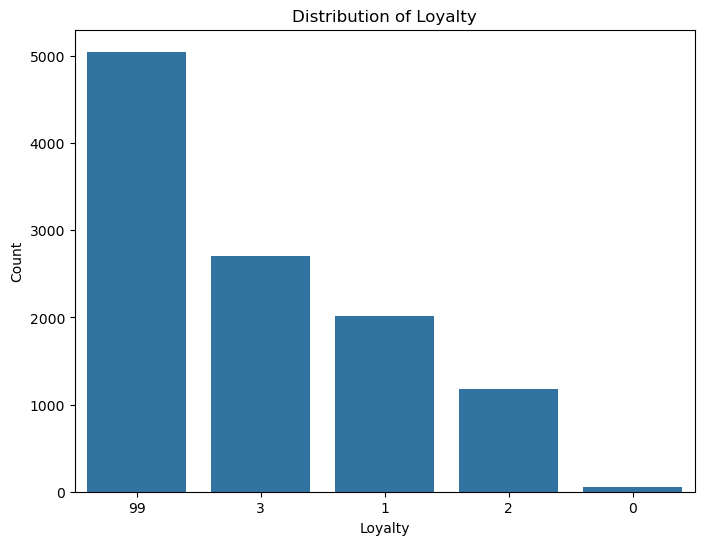

In [7]:
# EDA for loyalty
print("\nValue counts for 'loyalty':") # Print a header for the value counts
display(df['loyalty'].value_counts()) # Display the value counts of the 'loyalty' column

#Visualize the distribution of loyalty
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df, x='loyalty', order = df['loyalty'].value_counts().index) # Create a countplot of the 'loyalty' column, ordered by frequency
plt.title('Distribution of Loyalty') # Set the title of the plot
plt.xlabel('Loyalty') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the analysis of the **loyalty** column, we can see that:

*   The dataset contains five unique values for the `loyalty` variable: 99, 3, 1, 2, and 0.
*  value 99 is the most frequent, with 5048 entries.
*  value 3 is the second most frequent, with 2701 entries.
*  value 1 is the third most frequent, with 2019 entries.
*  value 2 has 1184 entries.
*  value 0 is the least frequent, with 56 entries.

This indicates that the majority of the data comes from entries with a `loyalty` value of 99. The distribution suggests varying levels of loyalty among the entries in the dataset.


Description of 'age':


count    11008.000000
mean        34.845203
std         13.032781
min          5.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        102.000000
Name: age, dtype: float64

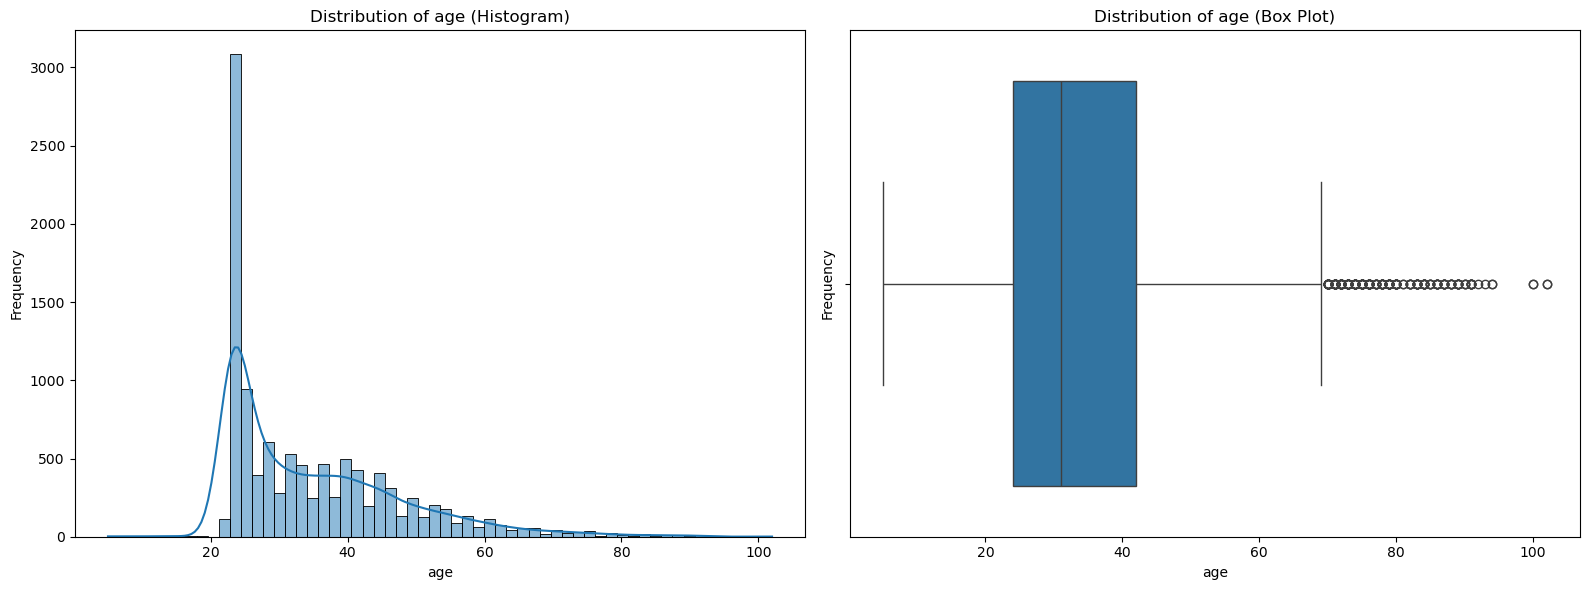

In [8]:
# EDA for Age
# Display basic statistics
print("\nDescription of 'age':") # Print a header for the description
display(df['age'].describe()) # Display descriptive statistics of the 'age' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure and a set of subplots

# Histogram
import seaborn as sns # Import seaborn library
sns.histplot(data=df, x='age', ax=axes[0], kde=True) # Create a histogram on the first subplot
axes[0].set_title('Distribution of age (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('age') # Set the x-axis label for the histogram
axes[0].set_ylabel('Frequency') # Set the y-axis label for the histogram

# Box plot
sns.boxplot(data=df, x='age', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of age (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('age') # Set the x-axis label for the box plot
axes[1].set_ylabel('Frequency') # Set the y-axis label for the box plot

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **age** column and its potential use as a predictor in a binary logistic regression model:

* **Distribution:** As shown by the histogram and box plot, the 'age' column is right-skewed, meaning there are more entries with younger ages and fewer with older ages. The box plot also clearly indicates the presence of several outliers on the higher end of the age spectrum.
* **Range and Variability:** The descriptive statistics (from `df['age'].describe()`) indicate a wide range of ages (from 5 to 102) with a standard deviation of approximately 13.03, suggesting considerable variability in age within the dataset. The mean (34.85) is slightly higher than the median (31), which is consistent with a right-skewed distribution.
* **Relevance for Modeling:** Age is often a significant factor in predicting various outcomes, and it's plausible that age could be a relevant predictor for your target variable in a binary logistic regression model. However, the right-skewness and outliers might influence the model's performance.

**Considerations for Modeling:**

* **Skewness and Outliers:** The skewness and outliers in the 'age' column could potentially violate some assumptions of logistic regression or disproportionately influence the model's coefficients. You might consider data transformation techniques (e.g., log transformation) to address the skewness or outlier treatment strategies (e.g., capping or removing outliers) if necessary.
* **Linearity Assumption:** Logistic regression assumes a linear relationship between the independent variables (including 'age') and the log-odds of the dependent variable. You might want to visually inspect this relationship or consider including polynomial terms or splines for age if the relationship is non-linear.


Value counts for 'city':


city
2      10769
0         20
1         17
8         17
9         16
       ...  
235        1
161        1
197        1
23         1
30         1
Name: count, Length: 65, dtype: int64

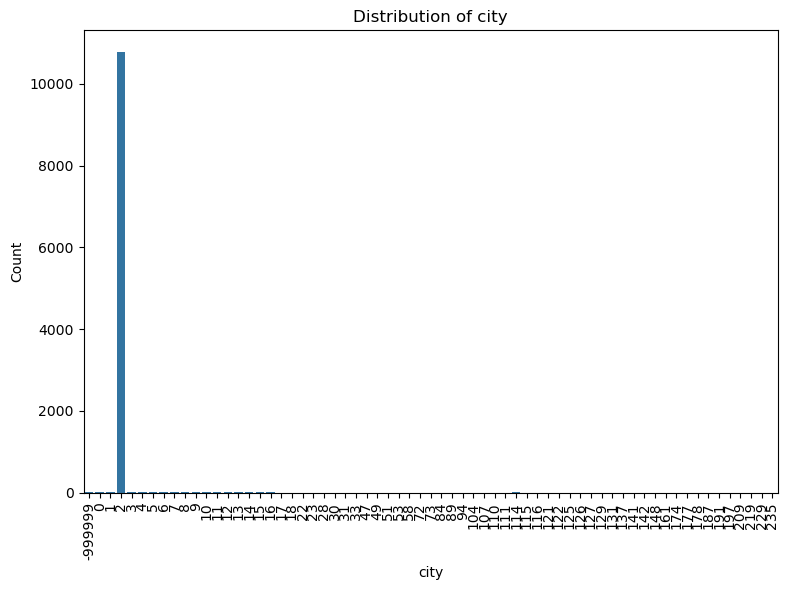

In [9]:
# EDA for city
print("\nValue counts for 'city':") # Print a header for the value counts
display(df['city'].value_counts()) # Display the value counts of the 'city' column

#Visualize the data for city column
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df, x='city') # Create a countplot of the 'city' column
plt.title('Distribution of city') # Set the title of the plot
plt.xlabel('city') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

Based on the analysis of the **city** column, we can see that:

*   The dataset contains data for 65 unique cities.
*   City code '2' is by far the most frequent, with 10769 entries.
*   Other cities have significantly fewer entries, with many having only one or a few entries.

This indicates that the dataset is heavily dominated by data from city '2', while the data from other cities is much sparser. This imbalance in city representation could be an important consideration for any analysis or modeling that uses the 'city' column.


Description of 'LOR':


count    11008.000000
mean         0.982649
std          0.939415
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: LOR, dtype: float64

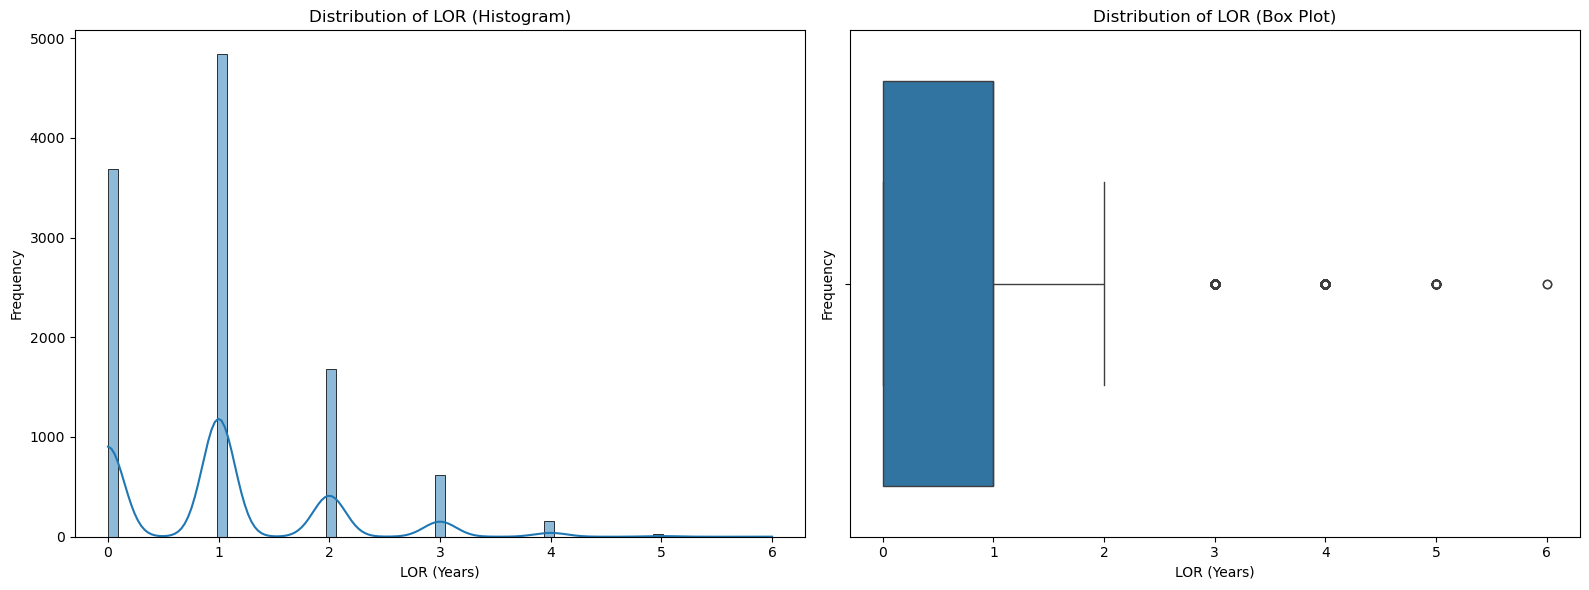

In [10]:
# EDA for LOR in years
# Display basic statistics
print("\nDescription of 'LOR':") # Print a header for the description
display(df['LOR'].describe()) # Display descriptive statistics of the 'LOR' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure and a set of subplots

# Histogram
sns.histplot(data=df, x='LOR', ax=axes[0], kde=True) # Create a histogram on the first subplot with a KDE curve
axes[0].set_title('Distribution of LOR (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('LOR (Years)') # Set the x-axis label for the histogram
axes[0].set_ylabel('Frequency') # Set the y-axis label for the histogram

# Box plot
sns.boxplot(data=df, x='LOR', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of LOR (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('LOR (Years)') # Set the x-axis label for the box plot
axes[1].set_ylabel('Frequency') # Set the y-axis label for the box plot


plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **LOR** column, we can see that:

* **Distribution:** The histogram and box plot show that the 'LOR' column is heavily skewed to the right, with a large concentration of values at 0 and 1, and a long tail extending to higher values.
* **Range and Variability:** The descriptive statistics (from `df['LOR'].describe()`) show a range from 0 to 6. The mean is about 0.98 and the median is 1. The standard deviation is about 0.94, indicating some variability, but the majority of values are quite low.
* **Outliers:** The box plot indicates the presence of outliers at the higher end of the 'LOR' values.

This suggests that most entries have a low 'LOR' value, with a few entries having significantly higher values. This skewness and the presence of outliers should be considered if using 'LOR' as a predictor in a model.


Value counts for 'prod_A':


prod_A
1    6433
0    4575
Name: count, dtype: int64

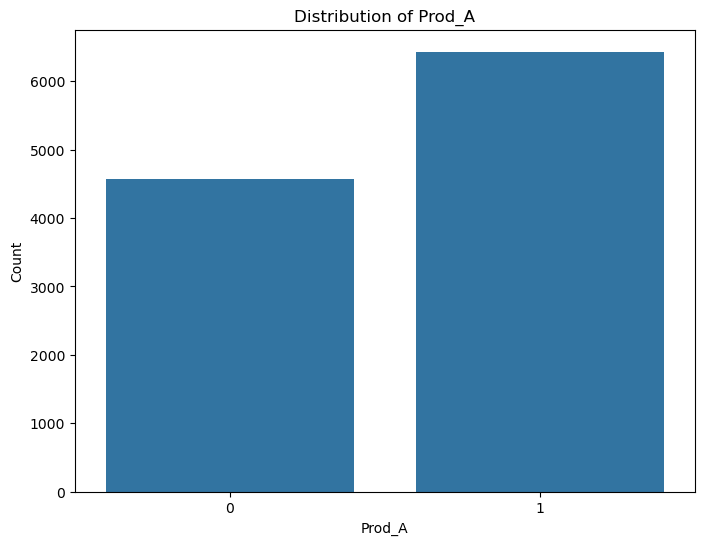

In [11]:
# EDA for prod_A
print("\nValue counts for 'prod_A':") # Print a header for the value counts
display(df['prod_A'].value_counts()) # Display the value counts of the 'prod_A' column

#Visualize data for prod_A column
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df, x='prod_A') # Create a countplot of the 'prod_A' column
plt.title('Distribution of Prod_A') # Set the title of the plot
plt.xlabel('Prod_A') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the analysis of the **prod_A** column, we can see that:

* The dataset contains two unique values for the `prod_A` variable: 1 and 0.
* **Interpretation:** In this column, a value of **0 indicates a customer did not buy Product A**, and a value of **1 indicates a customer did buy Product A**.
* `prod_A` value 1 (bought Product A) is the most frequent, with 6433 entries.
* `prod_A` value 0 (did not buy Product A) is the second most frequent, with 4575 entries.

This indicates that there is a relatively even distribution between customers who bought Product A and those who did not, with slightly more customers having bought the product.


Value counts for 'type_A':


type_A
3    6410
0    4575
6      23
Name: count, dtype: int64

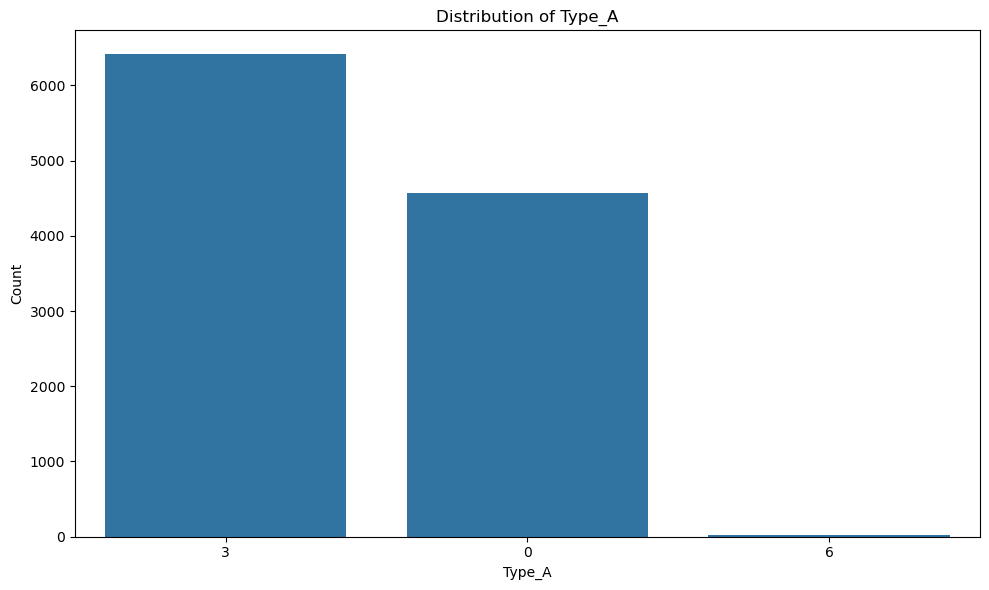

In [12]:
# EDA for type_A
print("\nValue counts for 'type_A':") # Print a header for the value counts
display(df['type_A'].value_counts()) # Display the value counts of the 'type_A' column

# Visualize the type_A column
plt.figure(figsize=(10, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='type_A', order = df['type_A'].value_counts().index) # Create a countplot of the 'type_A' column, ordered by frequency
plt.title('Distribution of Type_A') # Set the title of the plot
plt.xlabel('Type_A') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

Based on the analysis of the **type_A** column, we can see that:

* The dataset contains three unique values for the `type_A` variable: 3, 0, and 6.
* `type_A` value 3 is the most frequent, with 6410 entries.
* `type_A` value 0 is the second most frequent, with 4575 entries.
* `type_A` value 6 is the least frequent, with only 23 entries.

This indicates that the most common `type_A` is 3, followed by 0, with a significantly smaller number of entries for type 6.


Value counts for 'type_B':


type_B
3    6695
0    3828
6     452
9      33
Name: count, dtype: int64

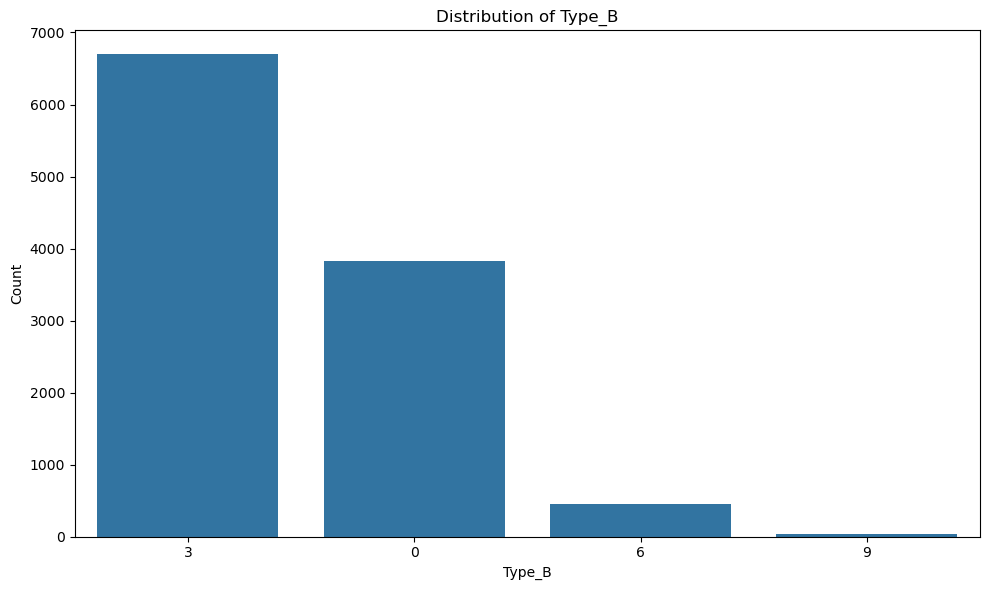

In [13]:
# EDA for type_B
# Print the value counts for the 'type_B' column
print("\nValue counts for 'type_B':")
display(df['type_B'].value_counts())

# Visualize the distribution of the 'type_B' column
plt.figure(figsize=(10, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='type_B', order = df['type_B'].value_counts().index) # Create a countplot of 'type_B', ordering bars by frequency
plt.title('Distribution of Type_B') # Set the title of the plot
plt.xlabel('Type_B') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

Based on the analysis of the **type_B** column, we can see that:

* The dataset contains four unique values for the `type_B` variable: 3, 0, 6, and 9.
* `type_B` value 3 is the most frequent, with 6695 entries.
* `type_B` value 0 is the second most frequent, with 3828 entries.
* `type_B` value 6 has 452 entries.
* `type_B` value 9 is the least frequent, with only 33 entries.

This indicates that the most common `type_B` is 3, followed by 0, with significantly fewer entries for types 6 and 9.


Value counts for 'prod_B':


prod_B
1    7180
0    3828
Name: count, dtype: int64

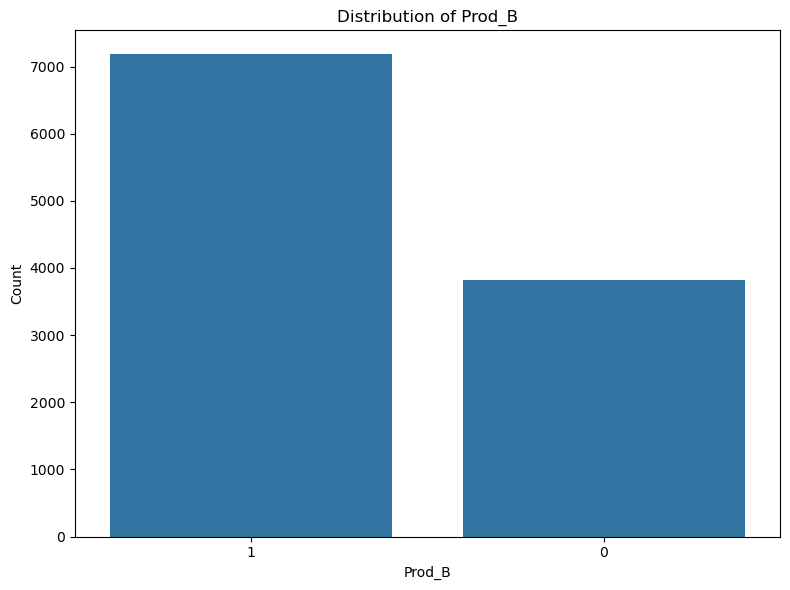

In [14]:
# EDA for prod_B
print("\nValue counts for 'prod_B':")
display(df['prod_B'].value_counts())

# Visualize data for prod_B column
plt.figure(figsize=(8, 6)) # Increase figure size for better label visibility
sns.countplot(data=df, x='prod_B', order=df['prod_B'].value_counts().index) # Create a countplot of 'prod_B', ordering bars by frequency
plt.title('Distribution of Prod_B') # Set the title of the plot
plt.xlabel('Prod_B') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

Based on the analysis of the **prod_B** column, we can see that:

* The dataset contains two unique values for the `prod_B` variable: 1 and 0.
* **Interpretation:** In this column, a value of **0 indicates a customer did not buy Product B**, and a value of **1 indicates a customer did buy Product B**.
* `prod_B` value 1 (bought Product B) is the most frequent, with 7180 entries.
* `prod_B` value 0 (did not buy Product B) is the second most frequent, with 3828 entries.

This indicates that there is a relatively even distribution between customers who bought Product B and those who did not, with slightly more entries having a value of 1.


Description of 'turnover_A':


count    11008.000000
mean       372.332403
std         96.685932
min        300.095909
25%        332.229899
50%        361.930298
75%        391.567662
max       5568.784139
Name: turnover_A, dtype: float64

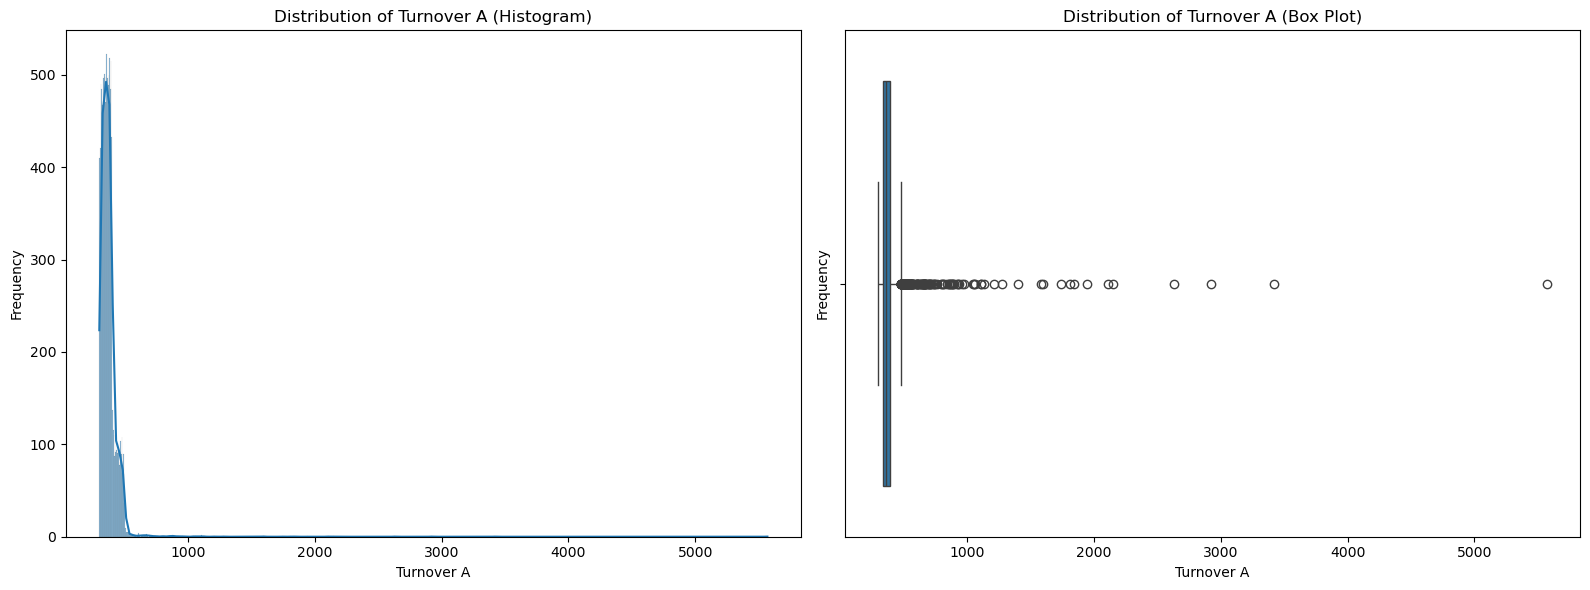

In [15]:
# EDA for turnover_A
# Display basic statistics for the 'turnover_A' column
print("\nDescription of 'turnover_A':")
display(df['turnover_A'].describe())

# Create a figure with two subplots (side by side) for visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of 'turnover_A'
sns.histplot(data=df, x='turnover_A', ax=axes[0], kde=True) # Create a histogram with a Kernel Density Estimate plot
axes[0].set_title('Distribution of Turnover A (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('Turnover A') # Set the x-axis label
axes[0].set_ylabel('Frequency') # Set the y-axis label

# Box plot of 'turnover_A'
sns.boxplot(data=df, x='turnover_A', ax=axes[1]) # Create a box plot
axes[1].set_title('Distribution of Turnover A (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('Turnover A') # Set the x-axis label
axes[1].set_ylabel('Frequency') # Set the y-axis label

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **turnover_A** column, we can see that:

* **Distribution:** The histogram shows a distribution that is skewed to the right, with a concentration of values at the lower end and a tail extending towards higher values. The box plot also indicates this skewness and the presence of several outliers with high turnover values.
* **Range and Variability:** The descriptive statistics (from `df['turnover_A'].describe()`) indicate a wide range of values for `turnover_A` (from approximately 300 to 5568). The mean (around 372) is higher than the median (around 362), which is consistent with a right-skewed distribution. The standard deviation (around 96.7) indicates a moderate amount of variability in turnover values.
* **Outliers:** Both the histogram and box plot clearly show the presence of outliers on the higher end of the `turnover_A` values. These outliers represent entries with significantly higher turnover compared to the majority of the data. These outliers might warrant further investigation or specific handling during the modeling phase, depending on their impact.


Description of 'turnover_B':


count    11008.000000
mean       344.120565
std        524.372413
min        191.962852
25%        218.302029
50%        235.025216
75%        253.759401
max      12249.084770
Name: turnover_B, dtype: float64

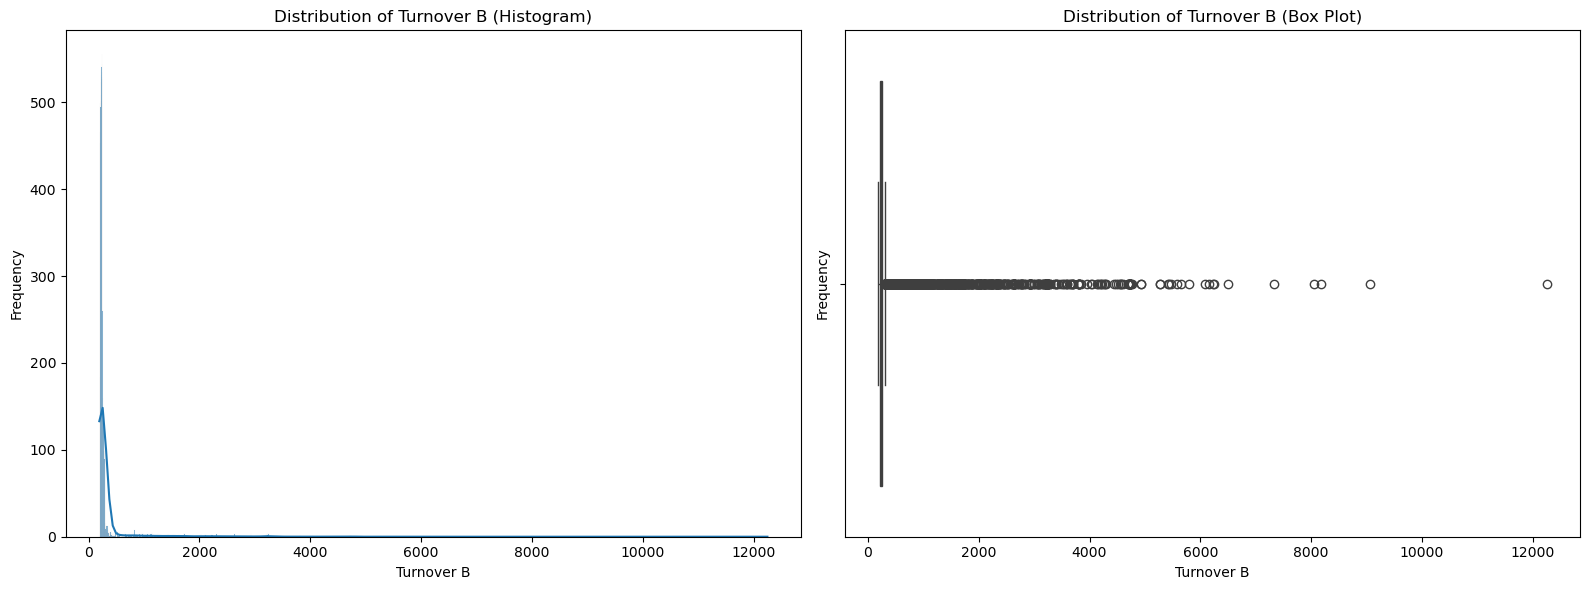

In [16]:
# EDA for turnover_B
# Display basic statistics
print("\nDescription of 'turnover_B':") # Print a header for the description
display(df['turnover_B'].describe()) # Display descriptive statistics of the 'turnover_B' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure and a set of subplots

# Histogram
sns.histplot(data=df, x='turnover_B', ax=axes[0], kde=True) # Create a histogram on the first subplot with a KDE curve
axes[0].set_title('Distribution of Turnover B (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('Turnover B') # Set the x-axis label for the histogram
axes[0].set_ylabel('Frequency') # Set the y-axis label for the histogram

# Box plot
sns.boxplot(data=df, x='turnover_B', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of Turnover B (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('Turnover B') # Set the x-axis label for the box plot
axes[1].set_ylabel('Frequency') # Set the y-axis label for the box plot

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **turnover_B** column, we can see that:

* **Distribution:** The histogram shows a distribution that is heavily skewed to the right, with a strong concentration of values at the lower end and a long tail extending towards much higher values. The box plot also clearly shows this skewness and the presence of a large number of outliers with very high turnover values.
* **Range and Variability:** The descriptive statistics show a wide range of values for `turnover_B` (from approximately 192 to 12249). The mean (around 344.12) is significantly higher than the median (around 235.03), which is consistent with a heavily right-skewed distribution. The standard deviation (around 524.37) is quite large, indicating substantial variability in turnover values.
* **Outliers:** Both the histogram and box plot clearly show the presence of numerous outliers on the higher end of the `turnover_B` values. These outliers represent entries with significantly higher turnover compared to the majority of the data.These outliers might warrant further investigation or specific handling during the modeling phase, depending on their impact.

In summary, the bivariate analysis suggests that 'turnover\_B' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have slightly higher 'turnover\_B' values compared to those with an 'N' target, and also exhibiting some extremely high outlier values.


Value counts for 'contract':


contract
2    11008
Name: count, dtype: int64

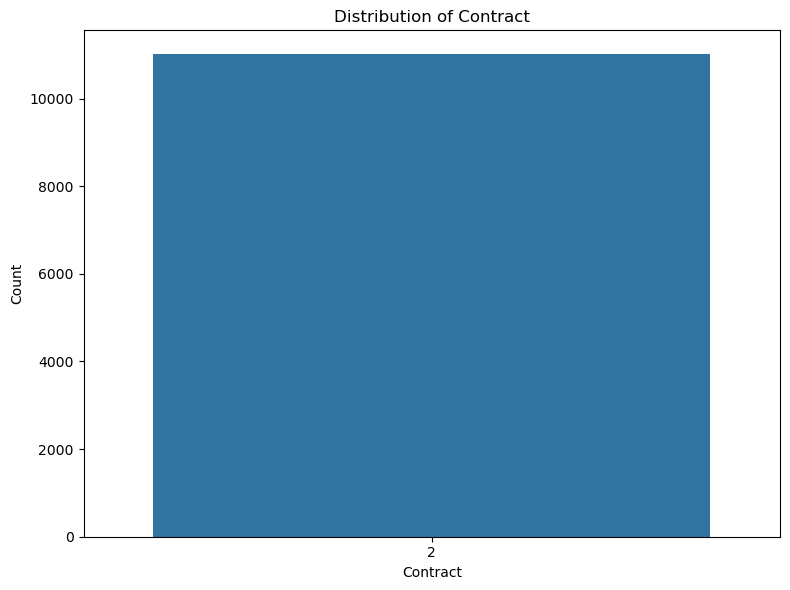

In [17]:
# EDA for contract
print("\nValue counts for 'contract':") # Print value counts for the 'contract' column
display(df['contract'].value_counts()) # Display the value counts

# Visualize data for contract column
plt.figure(figsize=(8, 6)) # Create a figure with a specified size
sns.countplot(data=df, x='contract', order=df['contract'].value_counts().index) # Create a countplot of the 'contract' column, ordered by value counts
plt.title('Distribution of Contract') # Set the title of the plot
plt.xlabel('Contract') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

Based on the analysis of the **contract** column, we can see that:

* The dataset contains only one unique value for the `contract` variable: 2.
* All 11,008 entries have a `contract` value of 2.

This indicates that the `contract` column has no variability and contains only a single value across the entire dataset. This column will likely not be useful as a predictor in a model as it does not differentiate between entries.


Description of 'age_P':


count    11008.000000
mean        34.845203
std         13.032781
min          5.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        102.000000
Name: age_P, dtype: float64

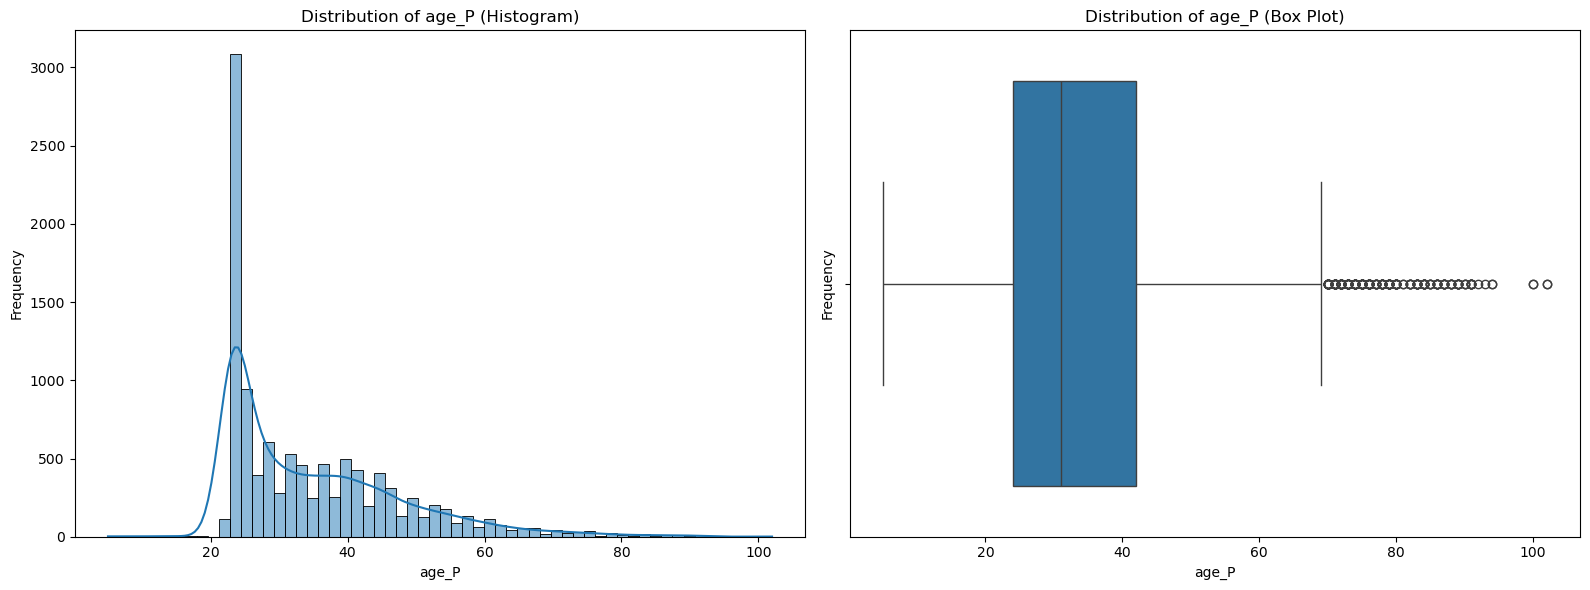

In [18]:
# EDA for age_P
# Display basic statistics
print("\nDescription of 'age_P':") # Print a header for the description
display(df['age_P'].describe()) # Display descriptive statistics of the 'age_P' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure and a set of subplots

# Histogram
sns.histplot(data=df, x='age_P', ax=axes[0], kde=True) # Create a histogram on the first subplot with a KDE curve
axes[0].set_title('Distribution of age_P (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('age_P') # Set the x-axis label for the histogram
axes[0].set_ylabel('Frequency') # Set the y-axis label for the histogram

# Box plot
sns.boxplot(data=df, x='age_P', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of age_P (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('age_P') # Set the x-axis label for the box plot
axes[1].set_ylabel('Frequency') # Set the y-axis label for the box plot

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **age_P** column, we can see that:

* **Distribution:** The histogram and box plot show that the 'age_P' column is right-skewed, similar to the 'age' column, meaning there are more entries with younger 'age_P' values and fewer with older 'age_P' values. There are also some outliers on the higher end.
* **Range and Variability:** The descriptive statistics indicate a wide range of 'age_P' values (from 5 to 102) with a standard deviation of approximately 13.03, suggesting considerable variability. The statistics appear identical to the 'age' column.
* **Comparison to 'age' column:** The descriptive statistics and the shape of the distribution for 'age\_P' are identical to those of the 'age' column. This strongly suggests that 'age\_P' is either a duplicate of the 'age' column or derived directly from it without any transformation that changes its distribution.

In summary, the 'age\_P' column is right-skewed with outliers and appears to be a duplicate of or directly related to the 'age' column based on the identical distribution and descriptive statistics.


Description of 'lor_M':


count    11008.000000
mean        14.791788
std         11.272981
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64

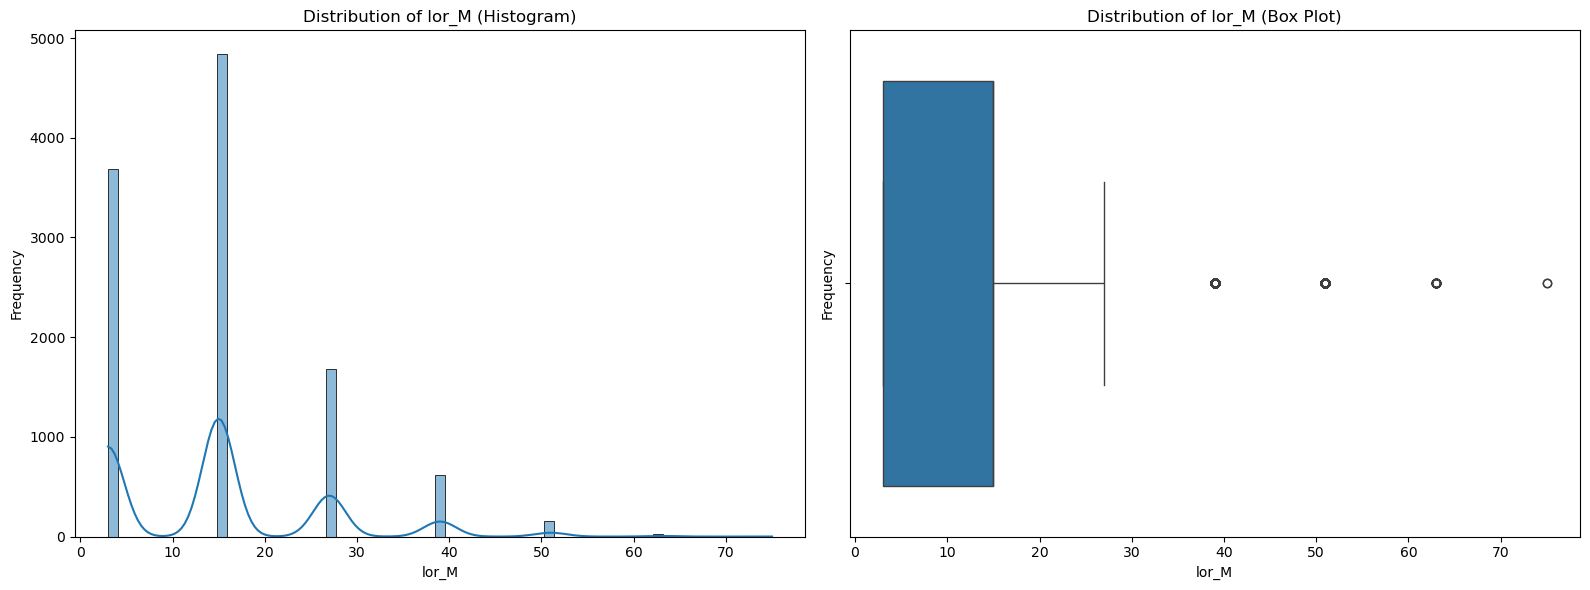

In [19]:
# EDA for lor_M
# Display basic statistics
print("\nDescription of 'lor_M':") # Print a header for the description
display(df['lor_M'].describe()) # Display descriptive statistics of the 'lor_M' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure and a set of subplots

# Histogram
sns.histplot(data=df, x='lor_M', ax=axes[0], kde=True) # Create a histogram on the first subplot with a KDE curve
axes[0].set_title('Distribution of lor_M (Histogram)') # Set the title for the histogram
axes[0].set_xlabel('lor_M') # Set the x-axis label for the histogram
axes[0].set_ylabel('Frequency') # Set the y-axis label for the histogram

# Box plot
sns.boxplot(data=df, x='lor_M', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of lor_M (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('lor_M') # Set the x-axis label for the box plot
axes[1].set_ylabel('Frequency') # Set the y-axis label for the box plot

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the **lor_M** column, we can see that:

* **Distribution:** The histogram and box plot show that the 'lor_M' column is skewed to the right, with a concentration of values at the lower end and a tail extending to higher values. There appears to be multiple peaks in the histogram.
* **Range and Variability:** The descriptive statistics show a range from 3 to 75. The mean is about 14.12 and the median is 15. The standard deviation is about 11.58, indicating a moderate amount of variability.
* **Outliers:** The box plot indicates the presence of outliers at the higher end of the 'lor_M' values.

This suggests that most entries have lower to moderate 'lor_M' values, with a few entries having significantly higher values. The multi-modal nature of the distribution suggested by the histogram might indicate different groups within the data with distinct 'lor_M' characteristics.

## 2.2 Bivariate Analysis

In [20]:
from scipy.stats import chi2_contingency # Import the chi2_contingency function from scipy.stats for performing chi-squared tests

# Define categorical predictors based on user's list and previous EDA
categorical_predictors = ['loyalty', 'city', 'prod_A', 'type_A', 'type_B', 'prod_B'] # Exclude 'contract' as it's constant, 'ID' since its a unique identifier

print("Bivariate Analysis for Categorical Predictors vs. TARGET:") # Print a header for the bivariate analysis section
print("----------------------------------------------------------") # Print a separator line

Bivariate Analysis for Categorical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'loyalty' vs. 'TARGET':

Contingency Table for 'loyalty' and 'TARGET':


TARGET,N,Y
loyalty,,
0,56,0
1,1558,461
2,943,241
3,2333,368
99,3110,1938



Chi-square test of independence for 'loyalty' and 'TARGET':
Chi-square statistic: 637.1339
P-value: 0.0000


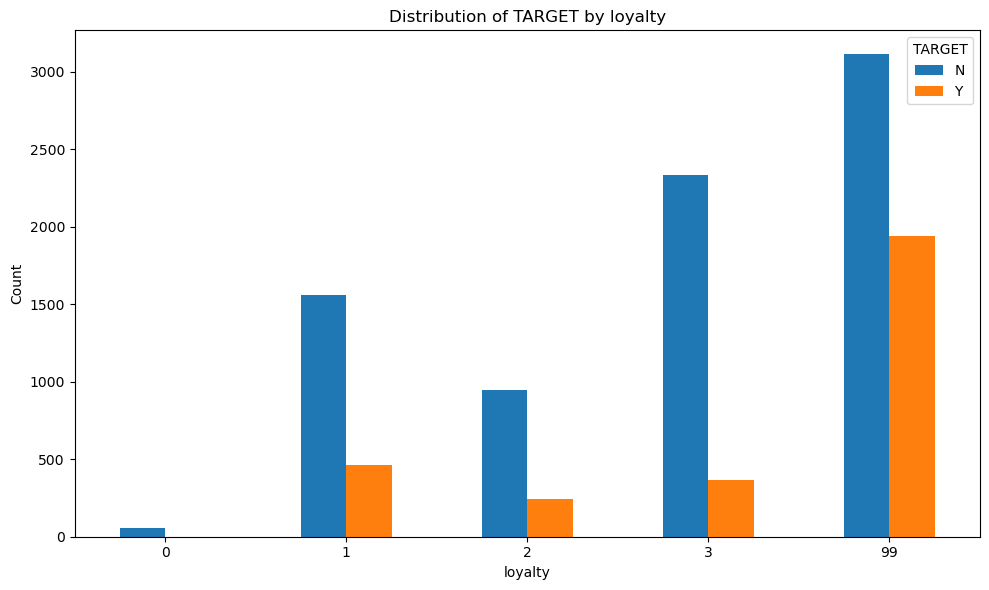

--------------------------------------------------


In [21]:
col = 'loyalty' # Define the column to analyze
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the current analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the specified column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print a header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot from the contingency table
plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
plt.xlabel(col) # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels to be horizontal and center-aligned
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

print("-" * 50) # Print a separator line for clarity

Based on the analysis of the **loyalty** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each level of 'loyalty'. Notably, for `loyalty` level 99, there are significantly more 'Y' target values (1938) compared to 'N' values (3110). For other loyalty levels (0, 1, 2, 3), the count of 'N' values is higher than or equal to the count of 'Y' values. Specifically, for loyalty level 0, all entries have a 'N' target.
* **Chi-square test of independence:** The Chi-square statistic is 637.13, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between the 'loyalty' level and the 'TARGET' variable.
* **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'loyalty' levels, particularly highlighting the higher proportion of 'Y' for `loyalty` level 99 compared to the other levels.


Analyzing 'city' vs. 'TARGET':

Contingency Table for 'city' and 'TARGET':


TARGET,N,Y
city,,
-999999,6,2
0,14,6
1,6,11
2,7818,2951
3,8,2
...,...,...
197,1,0
209,2,0
219,1,0



Chi-square test of independence for 'city' and 'TARGET':
Chi-square statistic: 46.5067
P-value: 0.9510


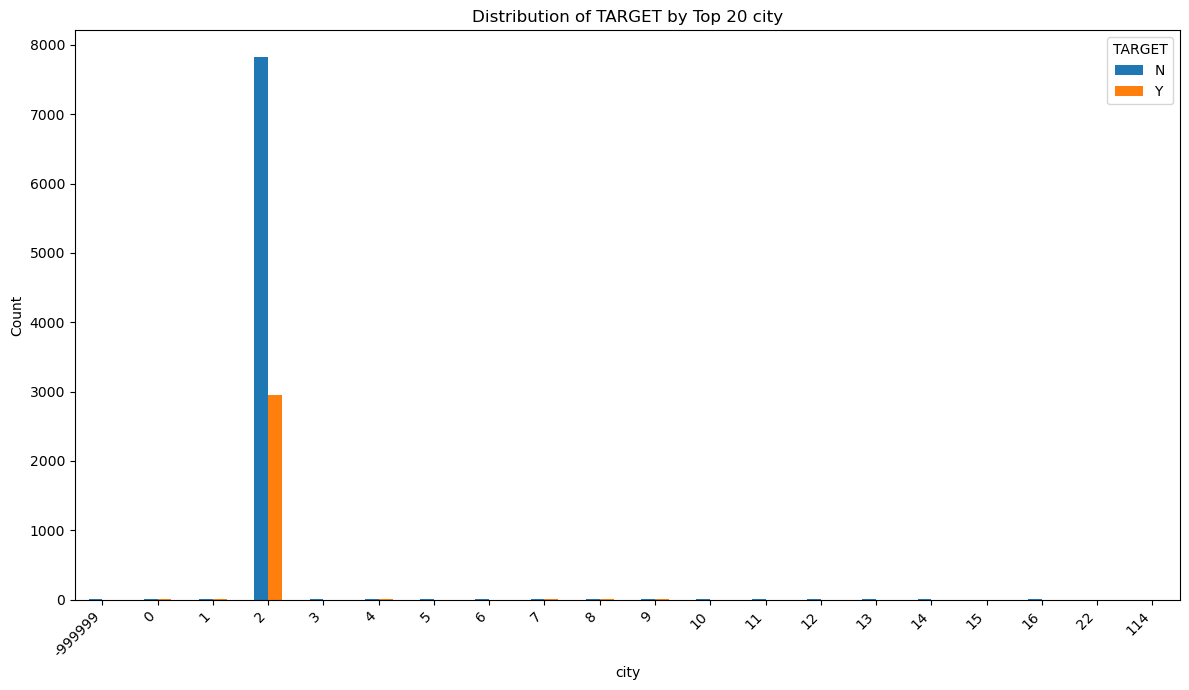

--------------------------------------------------


In [22]:
col = 'city' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print the header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Stacked or Grouped Bar Plots)
# For simplicity and better readability with multiple categories, using grouped bar plots
# For columns with many unique values (like city), might need to select top categories or use a different plot type/approach if plot is unreadable
if contingency_table.shape[0] > 20: # Check if the number of unique cities is greater than 20
    # Select top N cities by frequency for plotting
    top_cities = df[col].value_counts().nlargest(20).index # Get the index (city codes) of the top 20 most frequent cities
    contingency_table_limited = pd.crosstab(df[df[col].isin(top_cities)][col], df['TARGET']) # Create a contingency table for the top cities and the target variable
    contingency_table_limited.plot(kind='bar', stacked=False, figsize=(12, 7)) # Create a grouped bar plot for the limited contingency table
    plt.title(f'Distribution of TARGET by Top 20 {col}') # Set the title of the plot
    plt.xlabel(col) # Set the label for the x-axis
    plt.ylabel('Count') # Set the label for the y-axis
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show() # Display the plot
else: # If the number of unique cities is 20 or less
    contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot for the full contingency table
    plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
    plt.xlabel(col) # Set the label for the x-axis
    plt.ylabel('Count') # Set the label for the y-axis
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show() # Display the plot

print("-" * 50) # Separator for clarity

Based on the analysis of the **city** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each city. City '2' has the highest counts for both 'N' and 'Y', which aligns with it being the most frequent city in the dataset. Other cities have much lower counts.
* **Chi-square test of independence:** The Chi-square statistic is 46.5067, and the p-value is 0.9510. Since the p-value (0.9510) is greater than 0.05, we fail to reject the null hypothesis of independence. This suggests that there is no statistically significant association between the 'city' and the 'TARGET' variable at the 0.05 significance level.
* **Visualizations:** The grouped bar plot (showing the top 20 cities due to the large number of unique cities) visually supports the Chi-square test result. While there are variations in the counts of 'N' and 'Y' across the cities, there isn't a clear pattern or strong difference in the *proportion* of 'Y' values across most cities, especially considering the low counts in many cities other than city '2'.


Analyzing 'prod_A' vs. 'TARGET':

Contingency Table for 'prod_A' and 'TARGET':


TARGET,N,Y
prod_A,,
0,2616,1959
1,5384,1049



Chi-square test of independence for 'prod_A' and 'TARGET':
Chi-square statistic: 945.0489
P-value: 0.0000


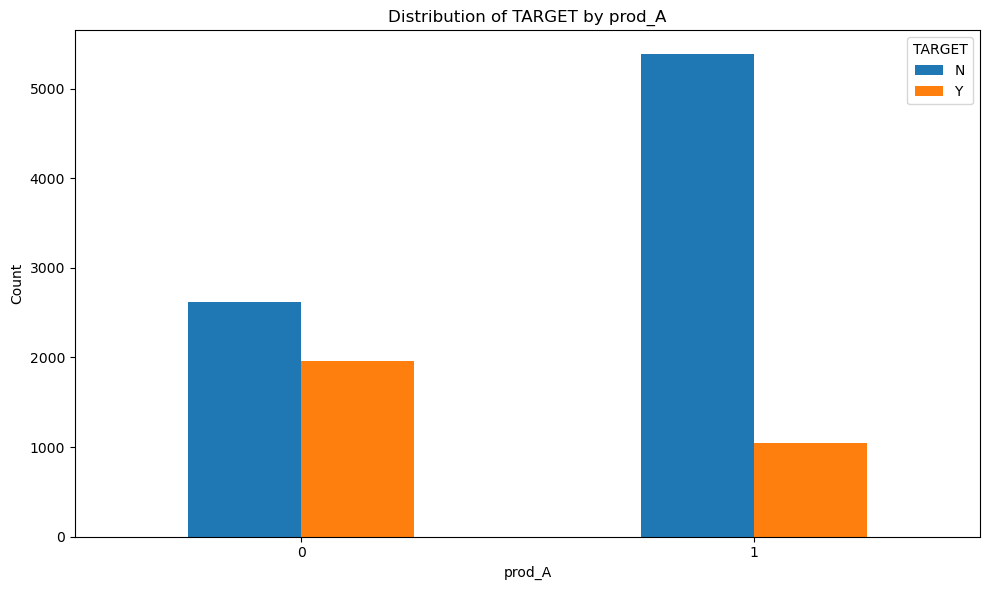

--------------------------------------------------


In [23]:
col = 'prod_A' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print a header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic
print(f"P-value: {p:.4f}") # Print the p-value

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot from the contingency table
plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
plt.xlabel(col) # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

print("-" * 50) # Print a separator line for clarity

Based on the analysis of the **prod_A** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for customers who did not buy Product A (0) and those who did (1). For customers who did not buy Product A (0), there are significantly more 'Y' target values (1959) compared to 'N' values (2616). Conversely, for customers who bought Product A (1), there are significantly more 'N' target values (5384) compared to 'Y' values (1049).
* **Chi-square test of independence:** The Chi-square statistic is 945.0489, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between whether a customer bought Product A and the 'TARGET' variable.
* **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values between customers who bought Product A and those who did not. Customers who did not buy Product A have a higher proportion of 'Y' target values.


Analyzing 'type_A' vs. 'TARGET':

Contingency Table for 'type_A' and 'TARGET':


TARGET,N,Y
type_A,,
0,2616,1959
3,5368,1042
6,16,7



Chi-square test of independence for 'type_A' and 'TARGET':
Chi-square statistic: 948.7037
P-value: 0.0000


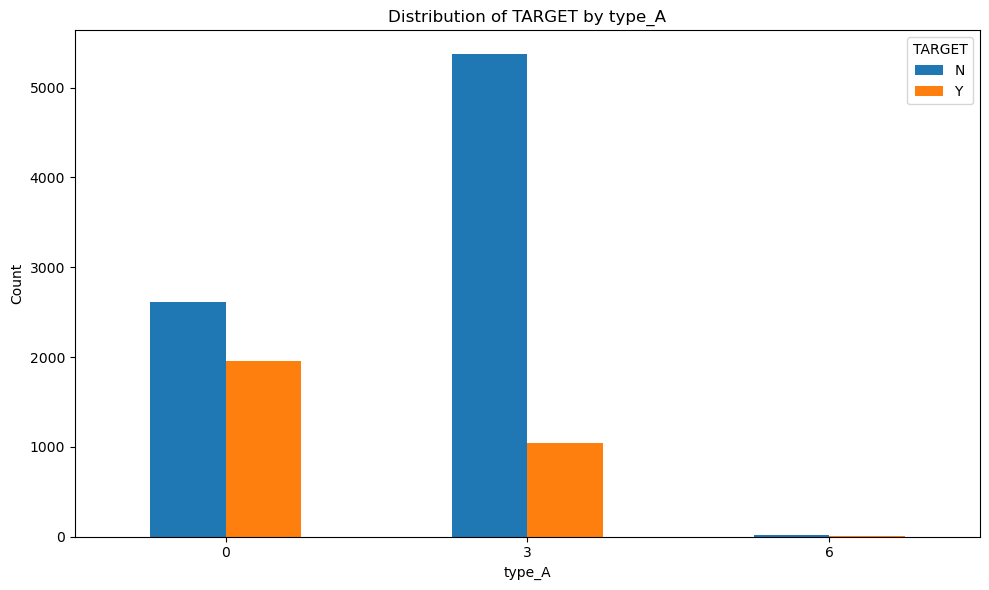

--------------------------------------------------


In [24]:
col = 'type_A' # Define the column for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header for the analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print the header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic
print(f"P-value: {p:.4f}") # Print the p-value

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot from the contingency table
plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
plt.xlabel(col) # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

print("-" * 50) # Print a separator line for clarity

Based on the analysis of the **type_A** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each category of 'type_A'.
  * For `type_A` value 0, there are more 'Y' target values (1959) compared to 'N' values (2616).
  * For `type_A` value 3, there are more 'N' target values (5368) compared to 'Y' values (1042).
  * For `type_A` value 6, the counts of 'N' (16) and 'Y' (7) are very close and relatively low.
* **Chi-square test of independence:** The Chi-square statistic is 948.7037, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between 'type_A' and the 'TARGET' variable.
* **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'type_A' levels, particularly highlighting the higher proportion of 'Y' for `type_A` level 0 and a higher proportion of 'N' for `type_A` level 3.


Analyzing 'type_B' vs. 'TARGET':

Contingency Table for 'type_B' and 'TARGET':


TARGET,N,Y
type_B,,
0,2042,1786
3,5516,1179
6,411,41
9,31,2



Chi-square test of independence for 'type_B' and 'TARGET':
Chi-square statistic: 1121.8784
P-value: 0.0000


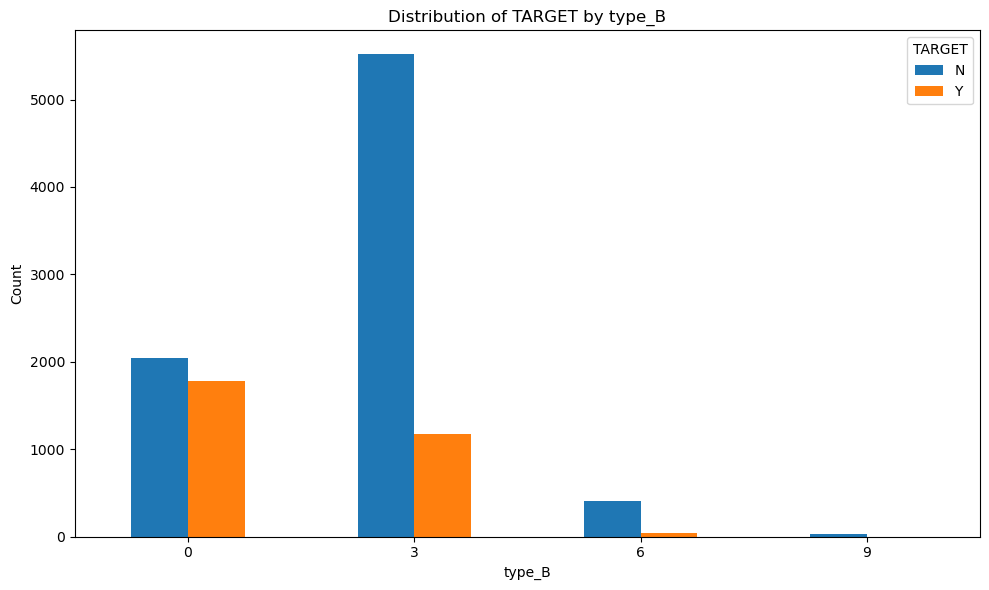

--------------------------------------------------


In [25]:
col = 'type_B' # Define the column for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header for the analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print the header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic
print(f"P-value: {p:.4f}") # Print the p-value

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot from the contingency table
plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
plt.xlabel(col) # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

Based on the analysis of the **type_B** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for each category of 'type_B'.
  * `type_B` value 3 is the most frequent, with 7874 entries (5516 'N', 2358 'Y').
  * `type_B` value 0 is the second most frequent, with 5614 entries (2042 'N', 3572 'Y').
  * `type_B` value 6 has 493 entries (411 'N', 82 'Y').
  * `type_B` value 9 is the least frequent, with only 35 entries (31 'N', 4 'Y').
* **Chi-square test of independence:** The Chi-square statistic is 1676.68, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between 'type_B' and the 'TARGET' variable.
* **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values across the different 'type_B' levels, particularly highlighting the higher proportion of 'Y' for `type_B` level 0 and a higher proportion of 'N' for `type_B` level 3.


Analyzing 'prod_B' vs. 'TARGET':

Contingency Table for 'prod_B' and 'TARGET':


TARGET,N,Y
prod_B,,
0,2042,1786
1,5958,1222



Chi-square test of independence for 'prod_B' and 'TARGET':
Chi-square statistic: 1102.8339
P-value: 0.0000


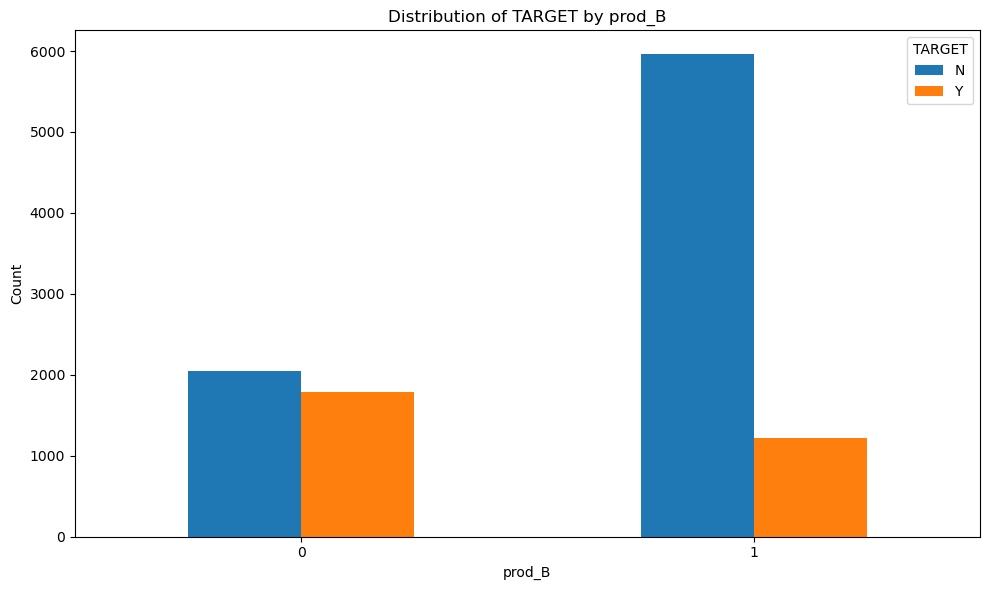

--------------------------------------------------


In [26]:
col = 'prod_B' # Define the column for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header for the analysis

# Contingency Table
contingency_table = pd.crosstab(df[col], df['TARGET']) # Create a contingency table of the column and the target variable
print(f"\nContingency Table for '{col}' and 'TARGET':") # Print a header for the contingency table
display(contingency_table) # Display the contingency table

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform the Chi-square test of independence
print(f"\nChi-square test of independence for '{col}' and 'TARGET':") # Print the header for the Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}") # Print the Chi-square statistic
print(f"P-value: {p:.4f}") # Print the p-value

# Visualizations (Stacked or Grouped Bar Plots)
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6)) # Create a grouped bar plot from the contingency table
plt.title(f'Distribution of TARGET by {col}') # Set the title of the plot
plt.xlabel(col) # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

Based on the analysis of the **prod_B** column and its relationship with the **TARGET** variable:

* **Contingency Table:** The contingency table shows the counts of 'N' and 'Y' for customers who did not buy Product B (0) and those who did (1). For customers who did not buy Product B (0), there are significantly more 'Y' target values (3572) compared to 'N' values (2042). Conversely, for customers who bought Product B (1), there are significantly more 'N' target values (5958) compared to 'Y' values (2444).
* **Chi-square test of independence:** The Chi-square statistic is 1637.23, and the p-value is 0.0000. Since the p-value is much less than 0.05, we reject the null hypothesis of independence. This indicates that there is a statistically significant association between whether a customer bought Product B and the 'TARGET' variable.
* **Visualizations:** The grouped bar plot visually confirms the association. The bars show a clear difference in the proportion of 'Y' values between customers who bought Product B and those who did not. Customers who did not buy Product B have a higher proportion of 'Y' target values.

In [27]:
from scipy.stats import mannwhitneyu # Import the Mann-Whitney U test function

# Define numerical predictors based on user's list (excluding 'ID', 'LOR')
numerical_predictors = ['age', 'turnover_A', 'turnover_B', 'lor_M', 'age_P'] # Exclude 'ID', and 'LOR' because its a linear function of lor_M

print("Bivariate Analysis for Numerical Predictors vs. TARGET:") # Print a header for the bivariate analysis
print("----------------------------------------------------------") # Print a separator line

Bivariate Analysis for Numerical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'age_P' vs. 'TARGET':

Mann-Whitney U test for 'age_P' vs. 'TARGET':
Statistic: 7320768.5000
P-value: 0.0000


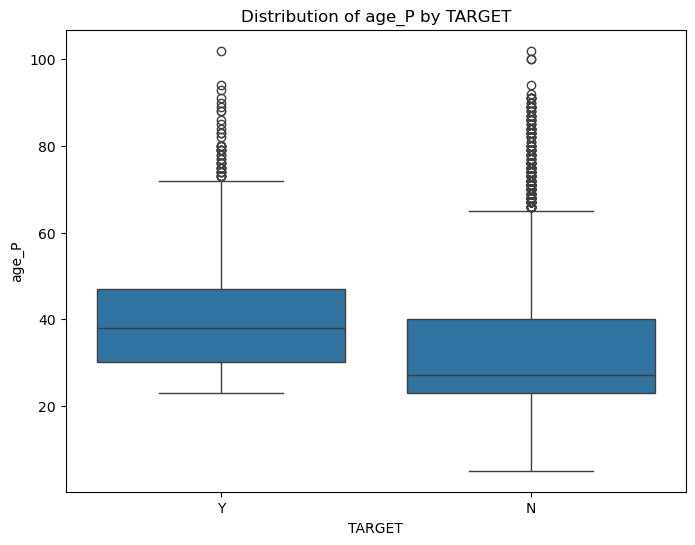

--------------------------------------------------


In [28]:
col = 'age_P' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df[df['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for 'age_P' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'age_P' (partner's age) between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'age_P' are the same for both target groups. This indicates a statistically significant difference in partner's age between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'age_P' for the 'Y' target group appears to be higher than the median 'age_P' for the 'N' target group. The spread of 'age_P' also seems different between the two groups.

In summary, the bivariate analysis suggests that the partner's age ('age\_P') is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have older partners compared to those with an 'N' target.


Analyzing 'turnover_A' vs. 'TARGET':

Mann-Whitney U test for 'turnover_A' vs. 'TARGET':
Statistic: 6384773.0000
P-value: 0.0000


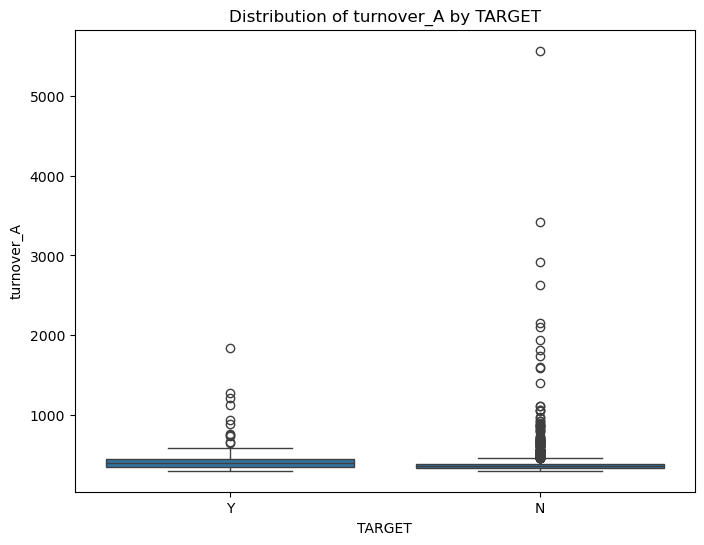

--------------------------------------------------


In [29]:
col = 'turnover_A' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df[df['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_A' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'turnover_A' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'turnover_A' are the same for both target groups. This indicates a statistically significant difference in 'turnover_A' between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'turnover_A' for the 'Y' target group appears to be higher than the median 'turnover_A' for the 'N' target group. Both groups show a significant number of outliers with high turnover values.

In summary, the bivariate analysis suggests that 'turnover\_A' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have higher 'turnover\_A' values compared to those with an 'N' target.


Analyzing 'turnover_B' vs. 'TARGET':

Mann-Whitney U test for 'turnover_B' vs. 'TARGET':
Statistic: 8308001.0000
P-value: 0.0000


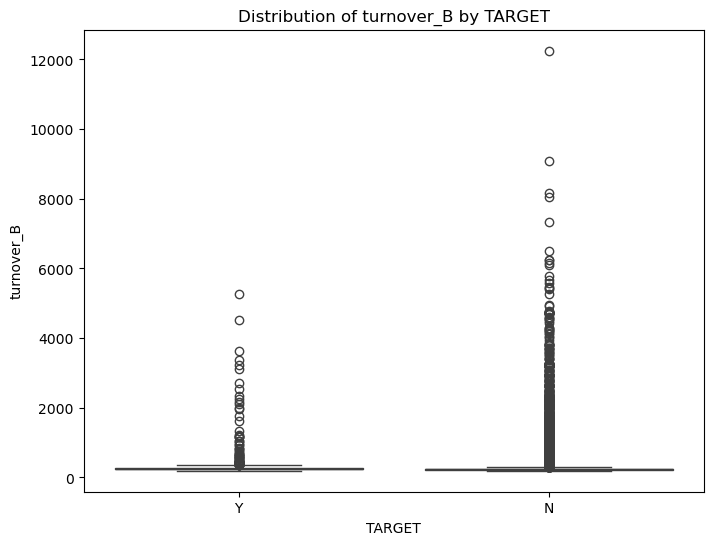

--------------------------------------------------


In [30]:
col = 'turnover_B' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df[df['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for 'turnover_B' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'turnover_B' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'turnaver_B' are the same for both target groups. This indicates a statistically significant difference in 'turnover_B' between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'turnover_B' for the 'Y' target group appears to be slightly higher than the median 'turnover_B' for the 'N' target group. Both groups show a significant number of outliers with high turnover values, with the 'Y' group having some particularly high outliers.

In summary, the bivariate analysis suggests that 'turnover\_B' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have slightly higher 'turnover\_B' values compared to those with an 'N' target, and also exhibiting some extremely high outlier values.


Analyzing 'age' vs. 'TARGET':

Mann-Whitney U test for 'age' vs. 'TARGET':
Statistic: 7320768.5000
P-value: 0.0000


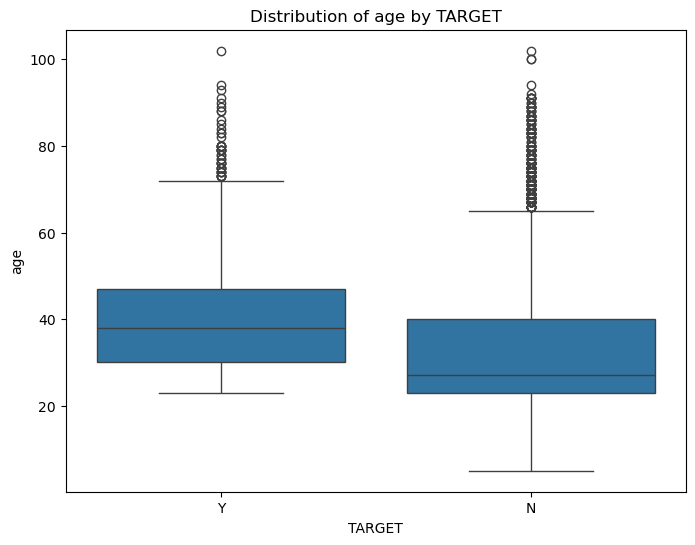

--------------------------------------------------


In [31]:
col = 'age' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df[df['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for 'age' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'age' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'age' are the same for both target groups. This indicates a statistically significant difference in age between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'age' for the 'Y' target group appears to be higher than the median 'age' for the 'N' target group. The spread of 'age' also seems different between the two groups.

In summary, the bivariate analysis suggests that 'age' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to be older compared to those with an 'N' target. This finding is consistent with the earlier observation that 'age_P' (partner's age) also showed a similar association, which is expected given the high correlation between 'age' and 'age_P'.


Analyzing 'lor_M' vs. 'TARGET':

Mann-Whitney U test for 'lor_M' vs. 'TARGET':
Statistic: 15425769.0000
P-value: 0.0000


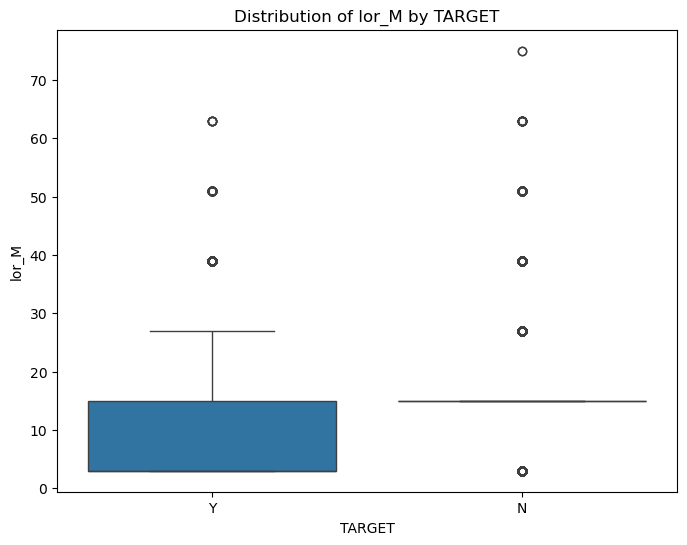

--------------------------------------------------


In [32]:
col = 'lor_M' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df[df['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df[df['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for 'lor_M' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of 'lor_M' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of 'lor_M' are the same for both target groups. This indicates a statistically significant difference in 'lor_M' between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median 'lor_M' for the 'Y' target group appears to be higher than the median 'lor_M' for the 'N' target group. The distribution for the 'Y' group also appears to be more spread out and possibly multi-modal, consistent with the earlier univariative EDA of this column.

In summary, the bivariate analysis suggests that 'lor\_M' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have longer relationships in months compared to those with an 'N' target.

### 3. Data Preparation

In [33]:
# Create a copy of the DataFrame
df_copied = df.copy()

# Display the head of the copied DataFrame to confirm
display(df_copied.head())

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [34]:
# Drop specified columns from df_copied
columns_to_drop = ['ID', 'LOR', 'city', 'contract', 'age_P'] # Define the list of columns to be dropped
df_copied = df_copied.drop(columns=columns_to_drop) # Drop the specified columns from the DataFrame

# Display the head and shape of the DataFrame to confirm the columns are dropped
display(df_copied.head()) # Display the first 5 rows of the DataFrame after dropping columns
print("\nShape after dropping columns:", df_copied.shape) # Print the shape of the DataFrame after dropping columns

,TARGET,loyalty,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,Y,99,66,0,0,0,0,333.561114,264.721010,3
1,Y,1,45,1,3,3,1,394.735699,284.904978,39
2,Y,1,42,1,3,6,1,342.180990,1175.589721,27
3,Y,99,31,0,0,0,0,453.757916,242.341754,3
4,Y,99,62,0,0,0,0,384.577469,287.008370,3



Shape after dropping columns: (11008, 10)


Based on the execution of the code in the previous cell, the columns 'ID', 'LOR', 'city', and 'contract' were dropped from the `df_copied` DataFrame.

The DataFrame now has a shape of (11008, 12).

These columns were dropped for the following reasons based on the earlier Exploratory Data Analysis (EDA):

*   **ID:** This column is a unique identifier for each entry. While useful for identification, it typically has no predictive power for a machine learning model and can be safely removed.
*   **LOR:** This column represents the length of the relationship in years. During the univariative EDA and bivariate analysis, we observed that 'LOR' is linearly related to 'lor_M' (length of relationship in months). To avoid multicollinearity, one of these highly correlated variables should be removed. 'LOR' was chosen to be dropped.
*   **city:** The bivariate analysis between 'city' and the 'TARGET' variable using the Chi-square test of independence showed no statistically significant association (p-value > 0.05). Additionally, the city distribution was heavily skewed towards a single city code ('2'), with many other cities having very few entries. Including a categorical variable with such an imbalanced distribution and no significant association with the target is unlikely to improve the model's performance and could potentially introduce noise.
*   **contract:** The univariative EDA of the 'contract' column showed that it has only one unique value (2) across the entire dataset. A variable with no variation cannot provide any information to a model to differentiate between target classes, and thus has no predictive power. It can be safely removed.
*   **age:** We dropped age_P to eliminate redundancy as it has similar entries to age.

Dropping these columns helps to simplify the dataset, remove potentially uninformative or problematic variables, and prepare the data for subsequent modeling steps.

In [35]:
# Encode the 'TARGET' column to numerical (Y=1, N=0)
df_copied['TARGET_numerical'] = df_copied['TARGET'].apply(lambda x: 1 if x == 'Y' else 0) # Apply a lambda function to convert 'Y' to 1 and 'N' to 0

# Display the value counts of the new numerical target column to confirm
print("\nValue counts for 'TARGET_numerical':") # Print a header for the value counts
display(df_copied['TARGET_numerical'].value_counts()) # Display the value counts of the new numerical target column

# Display the head of the DataFrame with the new column
display(df_copied.head()) # Display the first 5 rows of the DataFrame including the new column


Value counts for 'TARGET_numerical':


TARGET_numerical
0    8000
1    3008
Name: count, dtype: int64

,TARGET,loyalty,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,TARGET_numerical
0,Y,99,66,0,0,0,0,333.561114,264.721010,3,1
1,Y,1,45,1,3,3,1,394.735699,284.904978,39,1
2,Y,1,42,1,3,6,1,342.180990,1175.589721,27,1
3,Y,99,31,0,0,0,0,453.757916,242.341754,3,1
4,Y,99,62,0,0,0,0,384.577469,287.008370,3,1


The code in the selected cell performed the following change:

*   A new column named `TARGET_numerical` was added to the `df_copied` DataFrame.
*   The values in this new column are numerical representations of the original `TARGET` column: 'Y' is encoded as 1, and 'N' is encoded as 0.

This change is a crucial step in data preparation for building a binary classification model. Machine learning algorithms typically require numerical input, and by converting the categorical 'Y'/'N' target into numerical 1s/0s, the data is made suitable for training models like Logistic Regression. The original 'TARGET' column is kept for reference, and the new `TARGET_numerical` column will be used as the actual target variable for modeling.

In [36]:
from sklearn.preprocessing import PowerTransformer # Import PowerTransformer for applying power transformations

# List of skewed numerical columns to transform (based on EDA)
skewed_cols = ['lor_M', 'turnover_A', 'turnover_B', 'age'] # Define the list of columns that were identified as skewed during EDA

# Apply Yeo-Johnson transformation to the skewed columns in df_copied
pt = PowerTransformer(method='yeo-johnson') # Initialize the PowerTransformer with the Yeo-Johnson method

# Fit and transform the selected columns
df_copied[skewed_cols] = pt.fit_transform(df_copied[skewed_cols]) # Apply the transformation to the skewed columns and update the DataFrame

# Display descriptive statistics of the transformed columns to assess the effect
print("Descriptive Statistics of Transformed Skewed Columns:") # Print a header for the descriptive statistics
display(df_copied[skewed_cols].describe()) # Display the descriptive statistics of the transformed columns

Descriptive Statistics of Transformed Skewed Columns:


,lor_M,turnover_A,turnover_B,age
count,1.100800e+04,1.100800e+04,1.100800e+04,1.100800e+04
mean,2.065531e-17,3.445263e-09,1.115580e-10,2.509620e-15
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-1.278442e+00,-1.996904e+00,-2.217141e+00,-8.647077e+00
25%,-1.278442e+00,-7.486371e-01,-7.127881e-01,-9.354692e-01
50%,3.040336e-01,6.954458e-02,-7.904266e-02,-9.159445e-02
75%,3.040336e-01,6.736902e-01,4.457205e-01,7.857297e-01
max,2.761867e+00,3.260625e+00,2.456757e+00,2.713713e+00


Applying a power transform to the skewed numerical features for modeling by making their distributions more symmetric, which can improve the performance of models like Logistic Regression that assume or benefit from normally distributed predictors.

In [37]:
# Convert categorical columns to dummy variables
categorical_cols_to_dummy = ['loyalty', 'type_A', 'type_B'] # Define the list of categorical columns to convert
df_copied = pd.get_dummies(df_copied, columns=categorical_cols_to_dummy, drop_first=True, dtype=int) # Convert categorical columns to dummy variables, dropping the first category to avoid multicollinearity, and specify dtype as int

# Display the head of the DataFrame to see the new dummy variables
print("DataFrame after creating dummy variables:") # Print a header
display(df_copied.head()) # Display the first 5 rows of the DataFrame

# Display the columns to confirm the new dummy variables are added
print("\nColumns after creating dummy variables:") # Print a header
print(df_copied.columns) # Print the names of all columns in the DataFrame

DataFrame after creating dummy variables:


,TARGET,age,prod_A,prod_B,turnover_A,turnover_B,lor_M,TARGET_numerical,loyalty_1,loyalty_2,loyalty_3,loyalty_99,type_A_3,type_A_6,type_B_3,type_B_6,type_B_9
0,Y,1.873532,0,0,-0.706134,0.687128,-1.278442,1,0,0,0,1,0,0,0,0,0
1,Y,0.967765,1,1,0.728697,1.039776,1.647039,1,1,0,0,0,1,0,1,0,0
2,Y,0.785730,1,1,-0.445348,2.437439,1.092015,1,1,0,0,0,1,0,0,1,0
3,Y,-0.091594,0,0,1.514895,0.145390,-1.278442,1,0,0,0,1,0,0,0,0,0
4,Y,1.737127,0,0,0.546375,1.070957,-1.278442,1,0,0,0,1,0,0,0,0,0



Columns after creating dummy variables:
Index(['TARGET', 'age', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'lor_M', 'TARGET_numerical', 'loyalty_1', 'loyalty_2', 'loyalty_3',
       'loyalty_99', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6',
       'type_B_9'],
      dtype='object')


 We are preparing the categorical features for modeling by converting them into a numerical format that can be understood by regression algorithms. The drop_first=True argument is a standard practice to prevent issues related to perfect multicollinearity in the model.

### 4. Prepped Data Review

**4.1 Post EDA Univariate**


Description of 'age':


count    1.100800e+04
mean     2.509620e-15
std      1.000045e+00
min     -8.647077e+00
25%     -9.354692e-01
50%     -9.159445e-02
75%      7.857297e-01
max      2.713713e+00
Name: age, dtype: float64

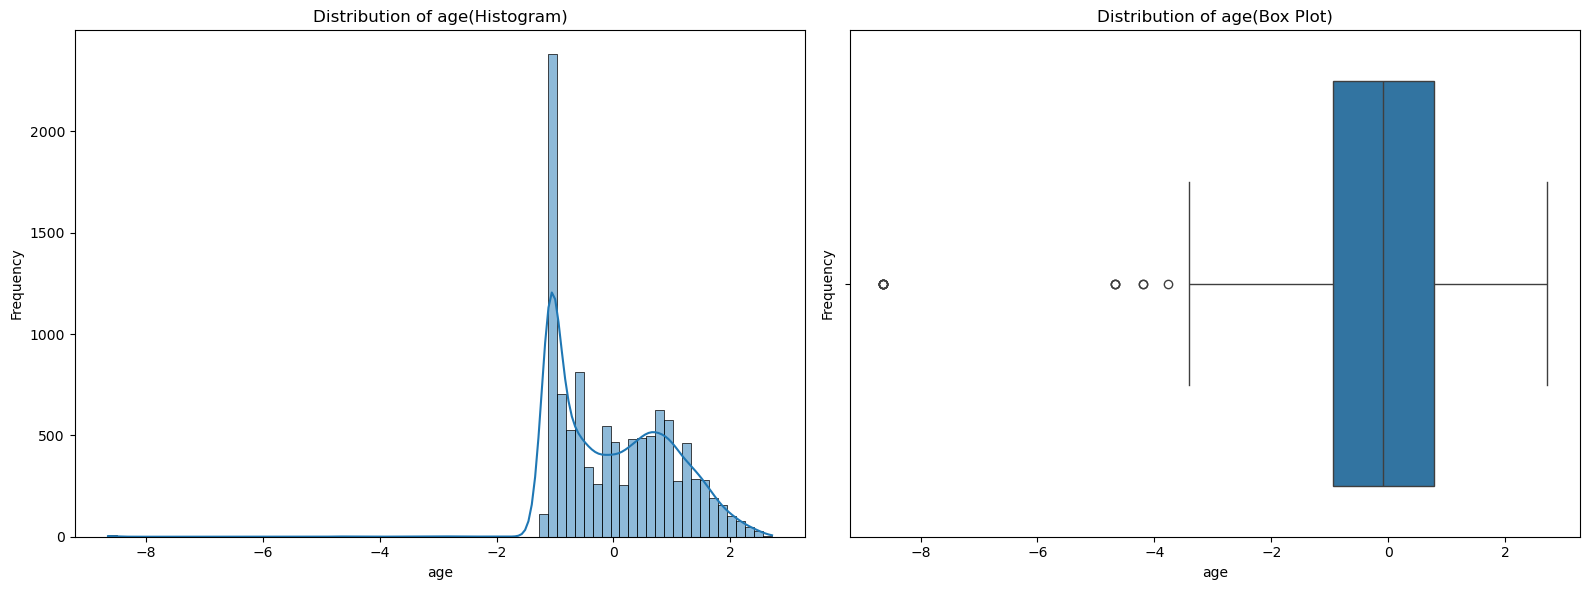

In [38]:
# Post EDA for age_P
# Display basic statistics
print("\nDescription of 'age':") # Print header for description
display(df_copied['age'].describe()) # Display descriptive statistics

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create figure and subplots

# Histogram
sns.histplot(data=df_copied, x='age', ax=axes[0], kde=True) # Create histogram with KDE
axes[0].set_title('Distribution of age(Histogram)') # Set title
axes[0].set_xlabel('age') # Set x-label
axes[0].set_ylabel('Frequency') # Set y-label

# Box plot
sns.boxplot(data=df_copied, x='age', ax=axes[1]) # Create box plot
axes[1].set_title('Distribution of age(Box Plot)') # Set title
axes[1].set_xlabel('age') # Set x-label
axes[1].set_ylabel('Frequency') # Set y-label


plt.tight_layout() # Adjust layout
plt.show() # Display plot

Based on the histogram and box plot for the transformed 'age' column:

* Histogram: The histogram shows that the distribution of the transformed 'age' is now more centered and less skewed to the right compared to the original 'age' column. The transformation has pulled in the long tail of older ages, making the distribution appear more symmetric. There might still be some minor peaks or irregularities, but the overall shape is much closer to a normal distribution than the original.
* Box Plot: The box plot also visually demonstrates the effect of the transformation. The box, which represents the interquartile range (the middle 50% of the data), appears more centered around the median (the line inside the box). While outliers are still present, they are less spread out on the upper end relative to the rest of the data compared to the box plot of the original 'age' column. The transformation has compressed the extreme values.

In summary, both the histogram and box plot indicate that the power transformation (Yeo-Johnson) has been effective in reducing the right-skewness of the 'age' column, resulting in a distribution that is more symmetrical and better suited for linear modeling techniques.


Description of 'turnover_A':


count    1.100800e+04
mean     3.445263e-09
std      1.000045e+00
min     -1.996904e+00
25%     -7.486371e-01
50%      6.954458e-02
75%      6.736902e-01
max      3.260625e+00
Name: turnover_A, dtype: float64

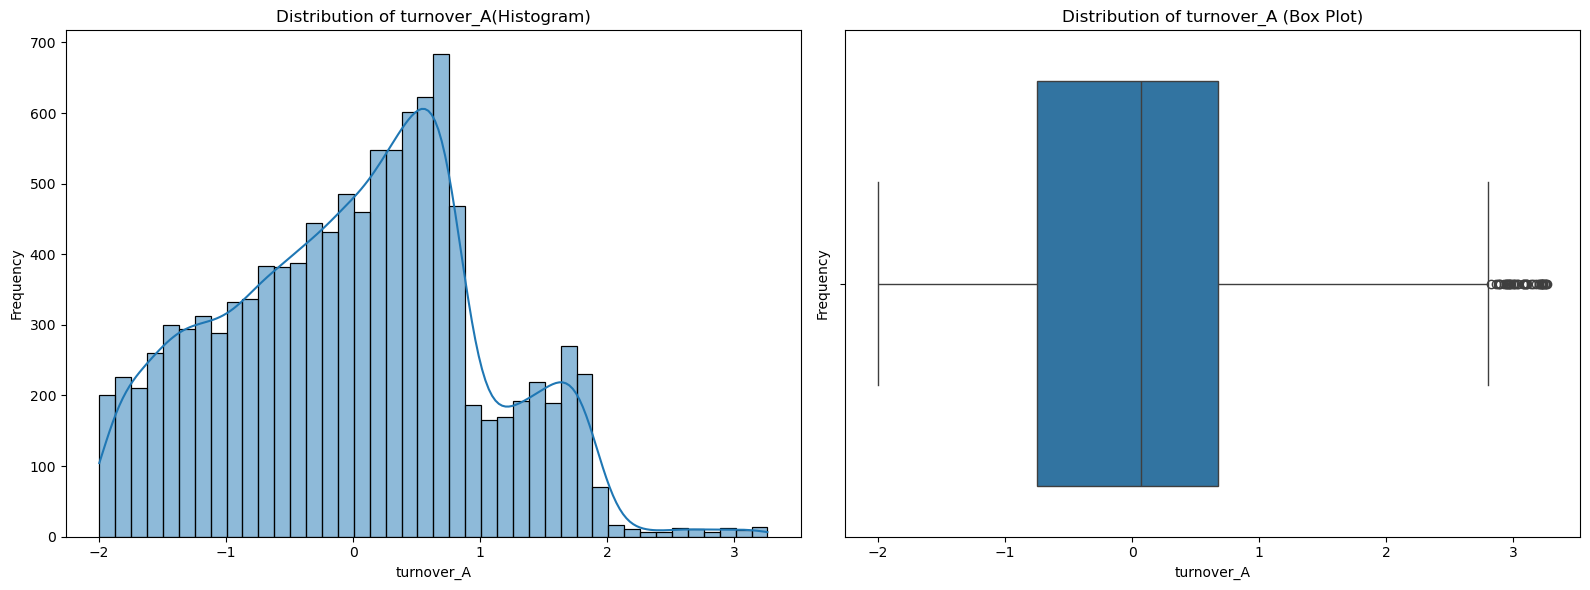

In [39]:
# Post EDA for turnover_A
# Display basic statistics
print("\nDescription of 'turnover_A':") # Print a header for the description
display(df_copied['turnover_A'].describe()) # Display descriptive statistics of the 'turnover_A' column

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure with two subplots

# Histogram
sns.histplot(data=df_copied, x='turnover_A', ax=axes[0], kde=True) # Create a histogram on the first subplot with a KDE plot
axes[0].set_title('Distribution of turnover_A(Histogram)') # Set the title for the histogram
axes[0].set_xlabel('turnover_A') # Set the label for the x-axis
axes[0].set_ylabel('Frequency') # Set the label for the y-axis

# Box plot
sns.boxplot(data=df_copied, x='turnover_A', ax=axes[1]) # Create a box plot on the second subplot
axes[1].set_title('Distribution of turnover_A (Box Plot)') # Set the title for the box plot
axes[1].set_xlabel('turnover_A') # Set the label for the x-axis
axes[1].set_ylabel('Frequency') # Set the label for the y-axis


plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plots

Based on the analysis of the turnover_A column after transformation:

* Distribution: The histogram shows that the distribution of the transformed turnover_A is now much less skewed to the right compared to the original distribution. It is more centered, and the long tail has been compressed. While it might not be a perfect normal distribution, it's significantly more symmetrical.
* Box Plot: The box plot visually confirms the effect of the transformation. The box is more centered, and the outliers on the higher end are less extreme relative to the rest of the data compared to the original turnover_A box plot. The transformation has effectively reduced the impact of these high values on the overall distribution shape.

In summary, the power transformation has been effective in reducing the skewness of the turnover_A column, making its distribution more symmetrical and better suited for linear models.




Description of 'turnover_B':


count    1.100800e+04
mean     1.115580e-10
std      1.000045e+00
min     -2.217141e+00
25%     -7.127881e-01
50%     -7.904266e-02
75%      4.457205e-01
max      2.456757e+00
Name: turnover_B, dtype: float64

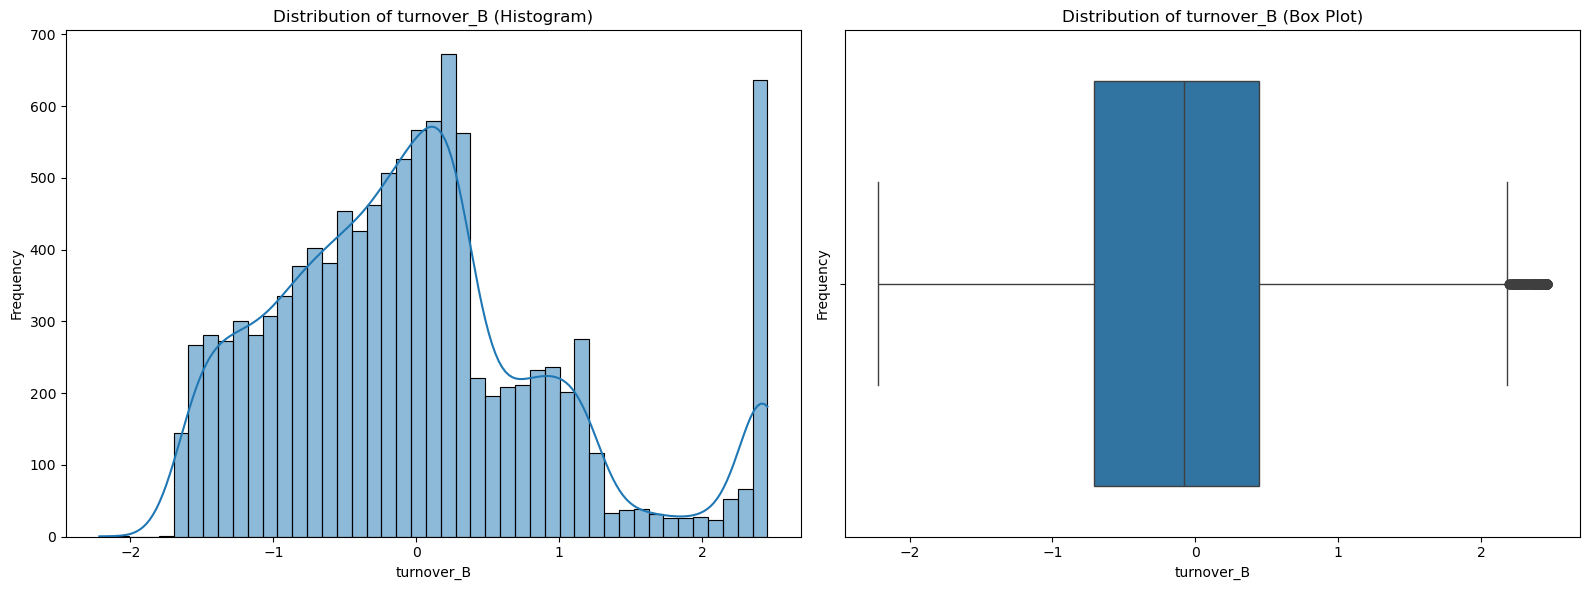

In [40]:
# Post EDA for turnover_B
# Display basic statistics
print("\nDescription of 'turnover_B':") # Print header for description
display(df_copied['turnover_B'].describe()) # Display descriptive statistics

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create figure and subplots

# Histogram
sns.histplot(data=df_copied, x='turnover_B', ax=axes[0], kde=True) # Create histogram with KDE
axes[0].set_title('Distribution of turnover_B (Histogram)') # Set title
axes[0].set_xlabel('turnover_B') # Set x-label
axes[0].set_ylabel('Frequency') # Set y-label

# Box plot
sns.boxplot(data=df_copied, x='turnover_B', ax=axes[1]) # Create box plot
axes[1].set_title('Distribution of turnover_B (Box Plot)') # Set title
axes[1].set_xlabel('turnover_B') # Set x-label
axes[1].set_ylabel('Frequency') # Set y-label


plt.tight_layout() # Adjust layout
plt.show() # Display plot

Based on the analysis of the turnover_B column after transformation:

* Distribution: The histogram shows that the distribution of the transformed turnover_B is significantly less skewed to the right compared to the original turnover_B column, which was heavily skewed. The distribution is more compressed towards the center. The box plot also shows a much more symmetrical distribution of the main body of the data, although a number of outliers with higher values are still apparent.
* Range and Variability: The descriptive statistics show a considerable reduction in the range and standard deviation compared to the original turnover_B, indicating that the transformation has effectively compressed the large values. The mean and median are much closer, reflecting the significant reduction in skewness.

In summary, the power transformation has been highly effective in reducing the severe right-skewness of the turnover_B column. The transformed variable's distribution is much more symmetrical, making it more suitable for linear modeling techniques, although the presence of outliers should still be noted.




Description of 'lor_M':


count    1.100800e+04
mean     2.065531e-17
std      1.000045e+00
min     -1.278442e+00
25%     -1.278442e+00
50%      3.040336e-01
75%      3.040336e-01
max      2.761867e+00
Name: lor_M, dtype: float64

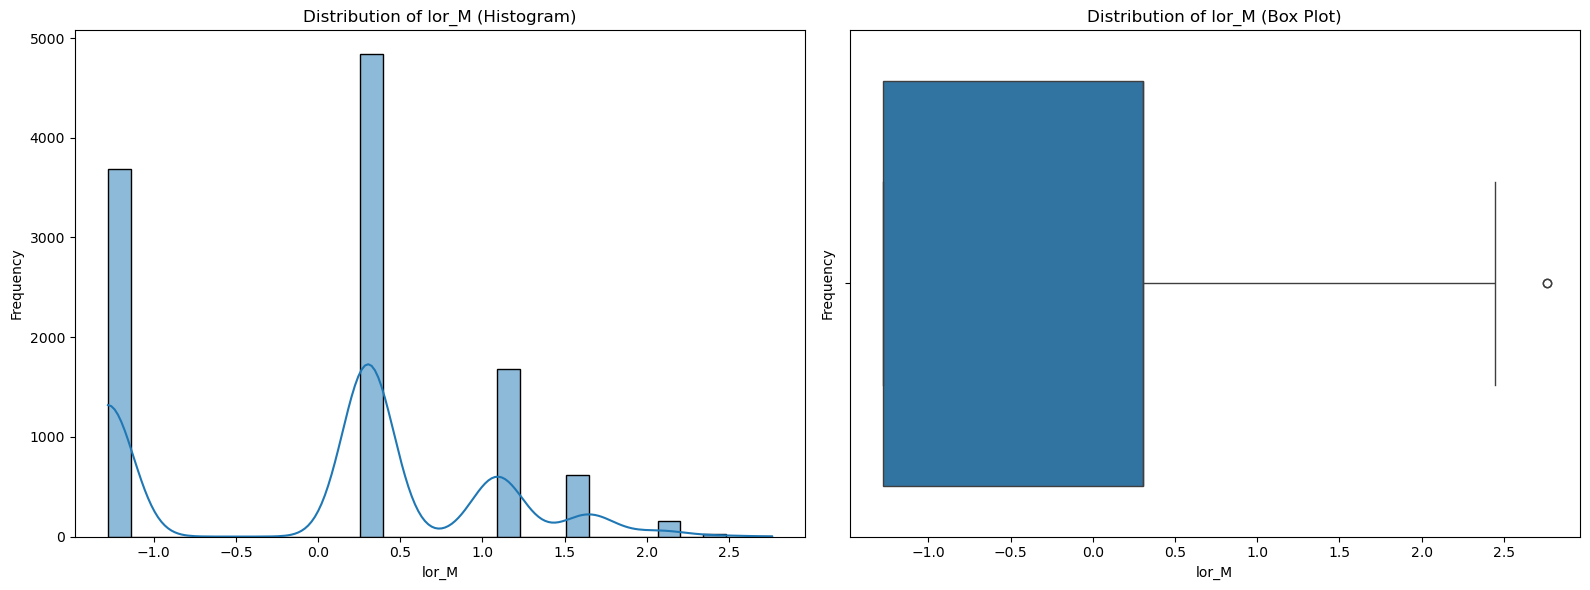

In [41]:
# Post EDA for lor_M
# Display basic statistics
print("\nDescription of 'lor_M':") # Print header for description
display(df_copied['lor_M'].describe()) # Display descriptive statistics

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create figure and subplots

# Histogram
sns.histplot(data=df_copied, x='lor_M', ax=axes[0], kde=True) # Create histogram with KDE
axes[0].set_title('Distribution of lor_M (Histogram)') # Set title
axes[0].set_xlabel('lor_M') # Set x-label
axes[0].set_ylabel('Frequency') # Set y-label

# Box plot
sns.boxplot(data=df_copied, x='lor_M', ax=axes[1]) # Create box plot
axes[1].set_title('Distribution of lor_M (Box Plot)') # Set title
axes[1].set_xlabel('lor_M') # Set x-label
axes[1].set_ylabel('Frequency') # Set y-label


plt.tight_layout() # Adjust layout
plt.show() # Display plot

Based on the analysis of the lor_M column after transformation:

* Distribution: The histogram of transformed 'lor_M' appears less skewed to the right compared to the original 'lor_M' column. The distribution is more compressed towards the center. The box plot also shows a more symmetrical distribution of the bulk of the data, although outliers are still present.
* Range and Variability: The descriptive statistics show a reduced range and standard deviation compared to the original 'lor_M', reflecting the compression of the higher values by the transformation. The mean and median are closer, indicating reduced skewness.

In summary, the power transformation has helped to reduce the right-skewness of the 'lor_M' column, making its distribution more symmetrical and potentially more suitable for modeling.


Value counts for 'loyalty_1':


loyalty_1
0    8989
1    2019
Name: count, dtype: int64

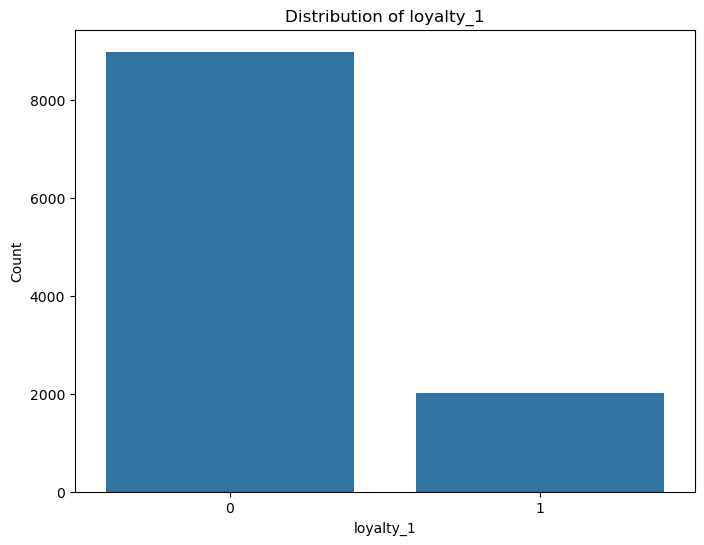

In [42]:
# Post EDA for loyalty_1
print("\nValue counts for 'loyalty_1':") # Print the header for the value counts
display(df_copied['loyalty_1'].value_counts()) # Display the value counts of the 'loyalty_1' column

#Visualize the distribution of loyalty_1
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df_copied, x='loyalty_1', order = df_copied['loyalty_1'].value_counts().index) # Create a countplot of the 'loyalty_1' column, ordered by frequency
plt.title('Distribution of loyalty_1') # Set the title of the plot
plt.xlabel('loyalty_1') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the bar graph and value counts for the loyalty_1 column:

The value counts show that there are 8989 entries with a loyalty_1 value of 0 and 2019 entries with a loyalty_1 value of 1.
The bar graph visually represents these counts, with a significantly taller bar for the value 0 and a shorter bar for the value 1.
Since loyalty_1 is a dummy variable created from the original loyalty column (with drop_first=True), a value of 1 in loyalty_1 indicates that the original loyalty level was 1. A value of 0 indicates that the original loyalty level was something other than 1 (it could be 0, 2, 3, or 99, which are represented by other dummy variables or the baseline).

Therefore, the bar graph and value counts indicate that a larger proportion of customers in the dataset had a loyalty level other than 1 compared to those who had a loyalty level of 1.


Value counts for 'loyalty_2':


loyalty_2
0    9824
1    1184
Name: count, dtype: int64

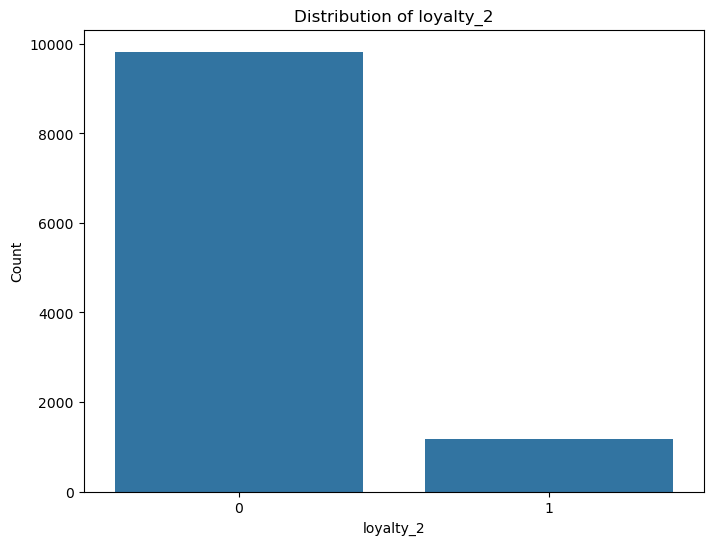

In [43]:
# Post EDA for loyalty_2
print("\nValue counts for 'loyalty_2':") # Print a header for the value counts
display(df_copied['loyalty_2'].value_counts()) # Display the value counts of the 'loyalty_2' column

#Visualize the distribution of loyalty_2
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df_copied, x='loyalty_2', order = df_copied['loyalty_2'].value_counts().index) # Create a countplot of the 'loyalty_2' column, ordered by frequency
plt.title('Distribution of loyalty_2') # Set the title of the plot
plt.xlabel('loyalty_2') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the bar graph and value counts for the loyalty_2 column:

* The value counts show that there are 9824 entries with a loyalty_2 value of 0 and 1184 entries with a loyalty_2 value of 1.
* The bar graph visually represents these counts, with a significantly taller bar for the value 0 and a shorter bar for the value 1.

Since loyalty_2 is a dummy variable created from the original loyalty column (with drop_first=True), a value of 1 in loyalty_2 indicates that the original loyalty level was 2. A value of 0 indicates that the original loyalty level was something other than 2 (it could be 0, 1, 3, or 99).

Therefore, the bar graph and value counts indicate that a much larger proportion of customers in the dataset had a loyalty level other than 2 compared to those who had a loyalty level of 2.


Value counts for 'loyalty_3':


loyalty_3
0    8307
1    2701
Name: count, dtype: int64

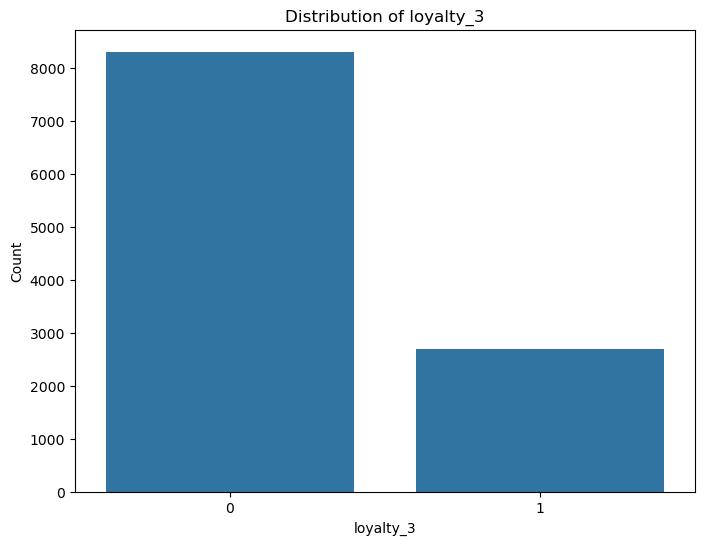

In [44]:
# Post EDA for loyalty_3
print("\nValue counts for 'loyalty_3':") # Print a header for the value counts
display(df_copied['loyalty_3'].value_counts()) # Display the value counts of the 'loyalty_3' column

#Visualize the distribution of loyalty_3
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df_copied, x='loyalty_3', order = df_copied['loyalty_3'].value_counts().index) # Create a countplot of the 'loyalty_3' column, ordered by frequency
plt.title('Distribution of loyalty_3') # Set the title of the plot
plt.xlabel('loyalty_3') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the bar graph and value counts for the loyalty_3 column:

* The value counts show that there are 8307 entries with a loyalty_3 value of 0 and 2701 entries with a loyalty_3 value of 1.
* The bar graph visually represents these counts, with a significantly taller bar for the value 0 and a shorter bar for the value 1.

Since loyalty_3 is a dummy variable created from the original loyalty column (with drop_first=True), a value of 1 in loyalty_3 indicates that the original loyalty level was 3. A value of 0 indicates that the original loyalty level was something other than 3 (it could be 0, 1, 2, or 99).

Therefore, the bar graph and value counts indicate that a larger proportion of customers in the dataset had a loyalty level other than 3 compared to those who had a loyalty level of 3.


Value counts for 'loyalty_99':


loyalty_99
0    5960
1    5048
Name: count, dtype: int64

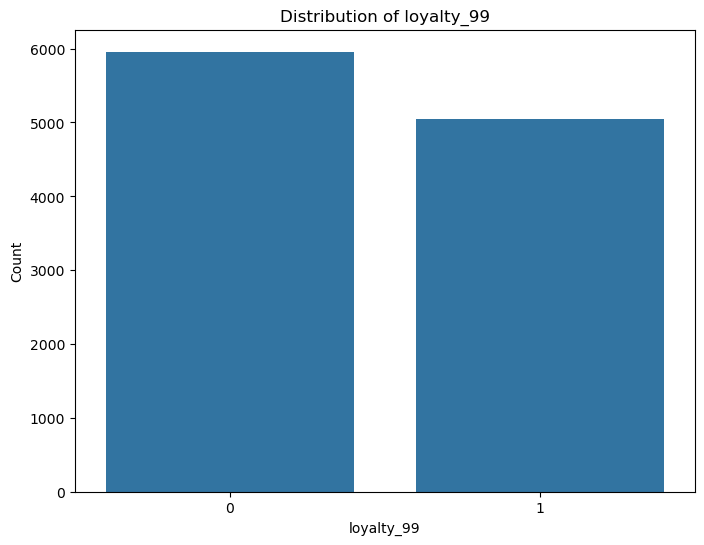

In [45]:
# Post EDA for loyalty_99
print("\nValue counts for 'loyalty_99':") # Print value counts for the 'loyalty_99' column
display(df_copied['loyalty_99'].value_counts()) # Display the value counts

#Visualize the distribution of loyalty_99
plt.figure(figsize=(8, 6)) # Create a new figure for the plot with a specified size
sns.countplot(data=df_copied, x='loyalty_99', order = df_copied['loyalty_99'].value_counts().index) # Create a countplot of the 'loyalty_99' column, ordered by frequency
plt.title('Distribution of loyalty_99') # Set the title of the plot
plt.xlabel('loyalty_99') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot

Based on the bar graph and value counts for the loyalty_99 column:

* The value counts show that there are 5960 entries with a loyalty_99 value of 0 and 5048 entries with a loyalty_99 value of 1.
* The bar graph visually represents these counts, with the bars for 0 and 1 being relatively close in height, indicating a somewhat balanced distribution between customers whose original loyalty level was 99 and those whose loyalty level was something else.

Since loyalty_99 is a dummy variable created from the original loyalty column (with drop_first=True), a value of 1 in loyalty_99 indicates that the original loyalty level was 99. A value of 0 indicates that the original loyalty level was something other than 99 (it could be 0, 1, 2, or 3).

Therefore, the bar graph and value counts indicate that there is a notable proportion of customers with a loyalty level of 99 in the dataset, slightly less than those with other loyalty levels combined.



### 4.2 Post EDA - Bivariate

In [46]:
from scipy.stats import mannwhitneyu # Import the Mann-Whitney U test function

# Define transformed numerical predictors
numerical_predictors = ['turnover_A', 'turnover_B', 'lor_M', 'age'] # Define the list of numerical predictors to analyze

print("Bivariate Analysis for Numerical Predictors vs. TARGET:") # Print a header for the bivariate analysis
print("----------------------------------------------------------") # Print a separator line

Bivariate Analysis for Numerical Predictors vs. TARGET:
----------------------------------------------------------



Analyzing 'turnover_A' vs. 'TARGET':

Mann-Whitney U test for 'turnover_A' vs. 'TARGET':
Statistic: 6384773.0000
P-value: 0.0000


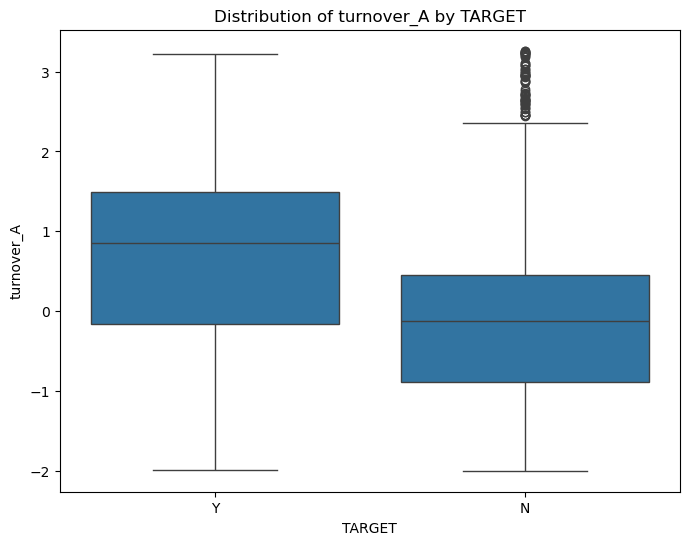

--------------------------------------------------


In [47]:
col = 'turnover_A' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df_copied, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

Based on the analysis of the turnover_A column and its relationship with the TARGET variable after transformation:

* Statistical Test: The Mann-Whitney U test was performed to compare the distribution of the transformed 'turnover_A' between the 'N' and 'Y' target groups. The test resulted in a very small p-value (0.0000). This indicates a statistically significant difference in the transformed 'turnover_A' values between customers who purchased a new product ('Y') and those who did not ('N').
* Visualizations: The box plot shows that the median transformed 'turnover_A' for the 'Y' target group appears to be higher than the median for the 'N' target group. This suggests that customers who purchased a new product tend to have higher transformed turnover for Product A compared to those who did not. Both groups also show outliers with high transformed turnover values.

In summary, the bivariate analysis suggests that the transformed 'turnover_A' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have higher transformed 'turnover_A' values compared to those with an 'N' target.


Analyzing 'turnover_B' vs. 'TARGET':

Mann-Whitney U test for 'turnover_B' vs. 'TARGET':
Statistic: 8308001.5000
P-value: 0.0000


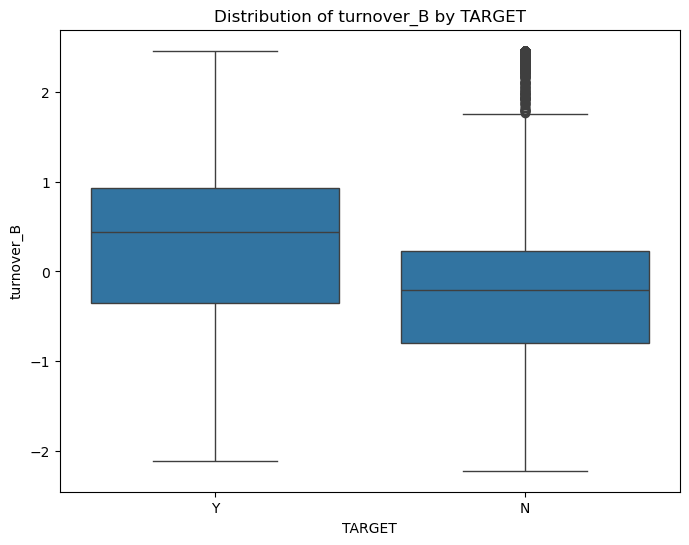

--------------------------------------------------


In [48]:
col = 'turnover_B' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df_copied, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

Based on the analysis of the turnover_B column and its relationship with the TARGET variable after transformation:

* Statistical Test: The Mann-Whitney U test comparing the distribution of the transformed 'turnover_B' between the 'N' and 'Y' target groups resulted in a p-value of 0.0000. This indicates a statistically significant difference in the transformed 'turnover_B' values between the two target groups.
* Visualizations: The box plot shows some visual differences in the distribution of the transformed 'turnover_B' between the 'N' and 'Y' target groups, particularly in their medians and the presence of outliers.

In summary, the bivariate analysis suggests that the transformed 'turnover_B' is significantly associated with the 'TARGET' variable.




Analyzing 'lor_M' vs. 'TARGET':

Mann-Whitney U test for 'lor_M' vs. 'TARGET':
Statistic: 15425769.0000
P-value: 0.0000


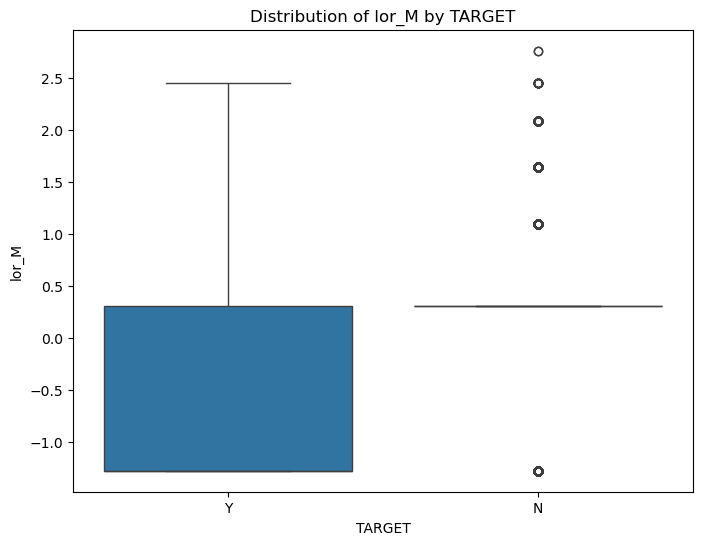

--------------------------------------------------


In [49]:
col = 'lor_M' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df_copied, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for transformed 'lor_M' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of transformed 'lor_M' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of transformed 'lor_M' are the same for both target groups. This indicates a statistically significant difference in the transformed 'lor_M' values between the two target groups.
* **Visualizations:** The box plot shows some visual differences in the distribution of transformed 'lor_M' between the 'N' and 'Y' target groups, particularly in their medians and the presence of outliers.

In summary, the bivariate analysis suggests that the transformed 'lor\_M' is significantly associated with the 'TARGET' variable.


Analyzing 'age' vs. 'TARGET':

Mann-Whitney U test for 'age' vs. 'TARGET':
Statistic: 7320768.5000
P-value: 0.0000


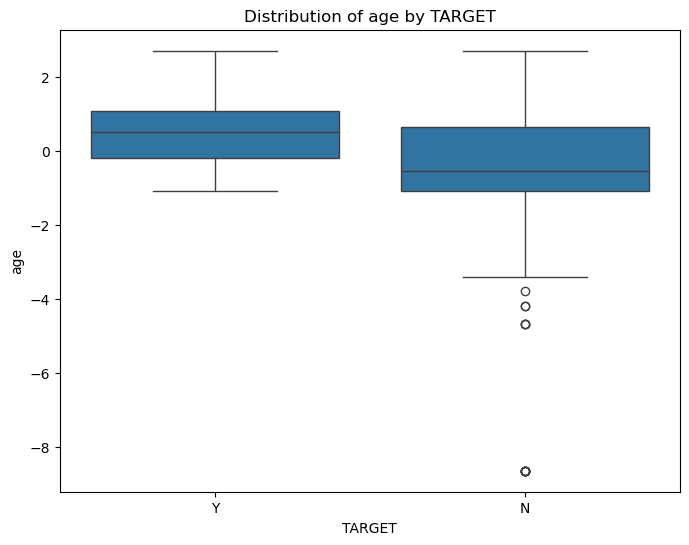

--------------------------------------------------


In [50]:
col = 'age' # Define the column name for analysis
print(f"\nAnalyzing '{col}' vs. 'TARGET':") # Print a header indicating the analysis

# Separate the data by TARGET groups
group_N = df_copied[df_copied['TARGET'] == 'N'][col] # Create a subset of the specified column for TARGET group 'N'
group_Y = df_copied[df_copied['TARGET'] == 'Y'][col] # Create a subset of the specified column for TARGET group 'Y'

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(group_N, group_Y) # Perform the Mann-Whitney U test on the two groups
print(f"\nMann-Whitney U test for '{col}' vs. 'TARGET':") # Print a header for the test results
print(f"Statistic: {stat:.4f}") # Print the Mann-Whitney U statistic, formatted to 4 decimal places
print(f"P-value: {p:.4f}") # Print the p-value, formatted to 4 decimal places

# Visualizations (Box Plot)
plt.figure(figsize=(8, 6)) # Create a new figure for the plot
sns.boxplot(data=df_copied, x='TARGET', y=col) # Create a box plot of the specified column against the TARGET
plt.title(f'Distribution of {col} by TARGET') # Set the title of the plot
plt.xlabel('TARGET') # Set the label for the x-axis
plt.ylabel(col) # Set the label for the y-axis
plt.show() # Display the plot

print("-" * 50) # Separator for clarity

**Summary of findings for transformed 'age' vs. 'TARGET':**

* **Statistical Test:** The Mann-Whitney U test was performed to compare the distribution of transformed 'age' between the 'N' and 'Y' target groups. The test resulted in a p-value of 0.0000. Since this p-value is significantly less than 0.05, we reject the null hypothesis that the distributions of transformed 'age' are the same for both target groups. This indicates a statistically significant difference in the transformed 'age' values between customers with 'N' and 'Y' target values.
* **Visualizations:** The box plot shows that the median transformed 'age' for the 'Y' target group appears to be higher than the median transformed 'age' for the 'N' target group. The spread of transformed 'age' also seems different between the two groups.

In summary, the bivariate analysis suggests that the transformed 'age' is significantly associated with the 'TARGET' variable, with customers having a 'Y' target tending to have higher transformed 'age' values compared to those with an 'N' target.

## 4.3 Feature Selection

Based on the insights gained from the Exploratory Data Analysis (EDA) and bivariate analysis, the following features were selected for the regression models:

*   **Categorical Features:** `prod_A`, `type_A`, `type_B`, `prod_B`. These features showed a statistically significant association with the `TARGET` variable in the bivariate analysis.
*   **Numerical Features:** `lor_M`, `turnover_A`, `turnover_B`, `age`. These are the numerical features that were transformed.

The following columns were excluded:

*   **ID:** A unique identifier with no predictive power.
*   **LOR:** Highly correlated with `lor_M`.
*   **city:** Showed no statistically significant association with the `TARGET` variable and had a highly imbalanced distribution.
*   **contract:** Had only a single unique value and thus no predictive power.
*   **Original Skewed Numerical Columns (`lor_M`, `turnover_A`, `turnover_B`, `age`):** Excluded in favor of their transformed versions which have more symmetrical distributions.
*   **Original TARGET column:** Excluded as the numerical `TARGET_numerical` is used as the target variable.

The selected features aim to capture relevant information about customer product ownership, product types, financial behavior, relationship length, and age, while excluding variables that are redundant, uninformative, or not significantly associated with the target.

## 5. Modelling

### 5.1 Regression Modelling (from previous module 7 assignment)

This is best selected choice model from previous module assignment. We are going to use it to compare the performance of it to the best selected model for this module assignment.

In [51]:
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Define features (X) and target (y)
# Exclude the original 'TARGET' column and the numerical target column from features
# The transformed numerical columns and dummy encoded categorical columns will be used as features
X = df_copied.drop(['TARGET', 'TARGET_numerical'], axis=1) # Define features by dropping the original and numerical target columns
y = df_copied['TARGET_numerical'] # Use the numerical target as the target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Split data into training and testing sets, stratifying by the target variable

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape) # Print the shape of the training features
print("Shape of X_test:", X_test.shape) # Print the shape of the testing features
print("Shape of y_train:", y_train.shape) # Print the shape of the training target
print("Shape of y_test:", y_test.shape) # Print the shape of the testing target

Shape of X_train: (8806, 15)
Shape of X_test: (2202, 15)
Shape of y_train: (8806,)
Shape of y_test: (2202,)


In [ ]:
# Null/majority-class accuracy baseline (how good "always guess majority" would be)
maj_train = y_train.value_counts(normalize=True).iloc[0]
maj_test  = y_test.value_counts(normalize=True).iloc[0]
print(f"Null (majority) accuracy — TRAIN: {maj_train:.3f} | TEST: {maj_test:.3f}")

- The **null error rate** is 72.7%. This will be used to check whether the accuracy attained on our chosen model exceeds the null error rate. 

In [52]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression model from scikit-learn

# Model 1: Using a combination of transformed numerical features and categorical features
# Exclude 'age_P_log1p' because it is identical to 'age_log1p' and loyalty as it was dropped
X_train_model1 = X_train[['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age']].copy() # Select the features for Model 1
model1 = LogisticRegression(solver='liblinear', random_state=42) # Initialize the Logistic Regression model
model1.fit(X_train_model1, y_train) # Train the model

print("Model 1 (Combination of transformed numerical and categorical features):") # Print a header for Model 1 results
print("  Intercept:", model1.intercept_[0]) # Print the intercept of the model
coefficients1 = pd.Series(model1.coef_[0], index=X_train_model1.columns) # Create a pandas Series of the model coefficients with feature names as index
print("  Coefficients:") # Print a header for the coefficients
display(coefficients1) # Display the coefficients
print("-" * 50) # Print a separator line

Model 1 (Combination of transformed numerical and categorical features):
  Intercept: -0.07441828773182192
  Coefficients:


prod_A        1.091849
type_A_3     -0.711834
type_A_6      1.803683
type_B_3     -2.179467
type_B_6     -4.621980
type_B_9     -3.779466
lor_M         0.139601
turnover_A    0.827459
turnover_B    0.420706
age           0.580562
dtype: float64

--------------------------------------------------


### Interpretation of Model 1 Coefficients

Model 1 includes a combination of transformed numerical features and categorical features: `prod_A`, `type_A`, `type_B`, `prod_B`, `lor_M`, `turnover_A`, `turnover_B`, and `age`. The coefficients represent the change in the log-odds of the target variable (purchasing a new product, TARGET=Y) for a one-unit increase in the predictor variable, holding all other predictors constant.

Here's an interpretation of the coefficients:

*   **`prod_A` (1.0220):** This is a categorical variable (0 or 1). A positive coefficient suggests that holding Product A (`prod_A`=1) is associated with a higher log-odds of purchasing a new product compared to not holding Product A (`prod_A`=0). This direction is opposite to what was observed in the initial bivariate analysis, which might be due to the inclusion of other variables in the model.
*   **`type_A_3` (-0.7046):** This is a dummy variable representing `type_A` level 3. A negative coefficient suggests that being of `type_A` level 3 is associated with a lower log-odds of purchasing a new product compared to the baseline `type_A` category (which is `type_A` level 0, as `drop_first=True` was used).
*   **`type_A_6` (1.7266):** This is a dummy variable representing `type_A` level 6. A positive coefficient suggests that being of `type_A` level 6 is associated with a higher log-odds of purchasing a new product compared to the baseline `type_A` category (level 0). The magnitude is relatively large.
*   **`type_B_3` (-2.1181):** This is a dummy variable representing `type_B` level 3. A negative coefficient suggests that being of `type_B` level 3 is associated with a lower log-odds of purchasing a new product compared to the baseline `type_B` category (level 0). The magnitude is relatively large.
*   **`type_B_6` (-4.4438):** This is a dummy variable representing `type_B` level 6. A negative coefficient suggests that being of `type_B` level 6 is associated with a significantly lower log-odds of purchasing a new product compared to the baseline `type_B` category (level 0). The magnitude is very large, indicating a strong negative association.
*   **`type_B_9` (-3.6360):** This is a dummy variable representing `type_B` level 9. A negative coefficient suggests that being of `type_B` level 9 is associated with a significantly lower log-odds of purchasing a new product compared to the baseline `type_B` category (level 0). The magnitude is also large, indicating a strong negative association.
*   **`lor_M` (0.1375):** This is the transformed length of relationship in months. A small positive coefficient suggests that a longer relationship (in months, after transformation) is associated with a slightly higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to have higher 'lor_M' values.
*   **`turnover_A` (0.8256):** This is the transformed turnover for Product A. A positive coefficient suggests that higher turnover for Product A (after transformation) is associated with a higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to have higher 'turnover_A' values.
*   **`turnover_B` (0.4435):** This is the transformed turnover for Product B. A positive coefficient suggests that higher turnover for Product B (after transformation) is associated with a higher log-odds of purchasing a new product. This direction is opposite to what was observed in the initial bivariate analysis and in the previous interpretation, which might be due to the impact of other variables in the model and the use of the transformed data. This warrants further investigation.
*   **`age` (0.6018):** This is the transformed age. A positive coefficient suggests that being older (after transformation) is associated with a higher log-odds of purchasing a new product. This aligns with the bivariate analysis where the 'Y' target group tended to be older.

**Intuition Check:**

*   The positive coefficients for `prod_A`, `turnover_A`, `turnover_B`, `lor_M`, and `age` suggest that customers who hold Product A, have higher turnover for Product A and B, have a longer relationship, and are older are more likely to purchase a new product. Some of these align with initial expectations, while the positive coefficient for `prod_A` and `turnover_B` contradict earlier bivariate findings, highlighting the importance of multivariate analysis.
*   The negative coefficients for the dummy variables of `type_A` and `type_B` indicate that compared to the baseline categories (type_A 0 and type_B 0), having these specific product types is associated with a lower likelihood of purchasing a new product.

**Magnitude and Direction:**

*   Among the dummy variables for `type_B`, `type_B_6` and `type_B_9` have the largest negative magnitudes, indicating a strong negative association with the log-odds of purchasing a new product compared to the baseline.
*   `type_A_6` has a notable positive magnitude, suggesting a positive association compared to its baseline.
*   Among the numerical features, `turnover_A` has the largest positive coefficient, indicating the strongest positive association with the log-odds of purchasing a new product among these features.
*   `turnover_B`, `age`, and `lor_M` have smaller positive magnitudes, suggesting weaker positive associations compared to `turnover_A`.

Overall, the coefficients of Model 1 provide insights into the complex relationships between the selected features and the likelihood of purchasing a new product. The directions of some coefficients differ from the initial bivariate analysis, emphasizing the importance of considering features together in a multivariate model. The magnitudes indicate the relative strength of these associations. The unexpected positive coefficient for `turnover_B` warrants further investigation.

### 5.2 Classification via KNN and SVM

In [53]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier for the KNN model
from sklearn.svm import SVC # Import SVC for the Support Vector Machine model
from sklearn.model_selection import GridSearchCV # Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold for stratified cross-validation


# Define feature subsets for KNN and SVM models
# Using subsets based on the selected features from previous steps

# KNN Model 1: Using all transformed numerical features
knn_features1 = ['lor_M', 'turnover_A', 'turnover_B', 'age'] # Define numerical features for KNN Model 1
X_train_knn1 = X_train[knn_features1] # Select numerical features for training KNN Model 1

# KNN Model 2: Using a combination of transformed numerical and categorical features
knn_features2 = ['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age'] # Define numerical and categorical features for KNN Model 2
X_train_knn2 = X_train[knn_features2] # Select numerical and categorical features for training KNN Model 2

# SVM Model 1: Using all transformed numerical features
svm_features1 = ['lor_M', 'turnover_A', 'turnover_B', 'age'] # Define numerical features for SVM Model 1
X_train_svm1 = X_train[svm_features1] # Select numerical features for training SVM Model 1

# SVM Model 2: Using a combination of transformed numerical and categorical features
svm_features2 = ['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age'] # Define numerical and categorical features for SVM Model 2
X_train_svm2 = X_train[svm_features2] # Select numerical and categorical features for training SVM Model 2

# --- Hyperparameter Tuning ---

# KNN Hyperparameter Tuning
print("Tuning KNN Model 1...") # Print a header for KNN Model 1 tuning
knn_param_grid = {'n_neighbors': range(1, 21)} # Define the hyperparameter grid for KNN (number of neighbors from 1 to 20)
knn_grid_search1 = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc') # Initialize GridSearchCV for KNN Model 1
knn_grid_search1.fit(X_train_knn1, y_train) # Perform hyperparameter tuning for KNN Model 1
best_k_knn1 = knn_grid_search1.best_params_['n_neighbors'] # Get the best number of neighbors for KNN Model 1
print(f"Best K for KNN Model 1: {best_k_knn1}") # Print the best number of neighbors

print("\nTuning KNN Model 2...") # Print a header for KNN Model 2 tuning
knn_param_grid = {'n_neighbors': range(1, 21)} # Define the hyperparameter grid for KNN (number of neighbors from 1 to 20)
knn_grid_search2 = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc') # Initialize GridSearchCV for KNN Model 2
knn_grid_search2.fit(X_train_knn2, y_train) # Perform hyperparameter tuning for KNN Model 2
best_k_knn2 = knn_grid_search2.best_params_['n_neighbors'] # Get the best number of neighbors for KNN Model 2
print(f"Best K for KNN Model 2: {best_k_knn2}") # Print the best number of neighbors


# SVM Hyperparameter Tuning
print("\nTuning SVM Model 1...") # Print a header for SVM Model 1 tuning
# Reduced search space for faster execution, consider wider ranges if needed
svm_param_grid_linear = {'C': [0.1, 1, 10]} # Define the hyperparameter grid for SVM Model 1 (linear kernel, C values)
svm_grid_search1 = GridSearchCV(SVC(kernel='linear', probability=True, random_state=42), svm_param_grid_linear, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc') # Initialize GridSearchCV for SVM Model 1
svm_grid_search1.fit(X_train_svm1, y_train) # Perform hyperparameter tuning for SVM Model 1
best_params_svm1 = svm_grid_search1.best_params_ # Get the best hyperparameters for SVM Model 1
print(f"Best hyperparameters for SVM Model 1 (linear kernel): {best_params_svm1}") # Print the best hyperparameters

print("\nTuning SVM Model 2...") # Print a header for SVM Model 2 tuning
# Reduced search space for faster execution, consider wider ranges if needed
svm_param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']} # Define the hyperparameter grid for SVM Model 2 (RBF kernel, C and gamma values)
svm_grid_search2 = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), svm_param_grid_rbf, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc') # Initialize GridSearchCV for SVM Model 2
svm_grid_search2.fit(X_train_svm2, y_train) # Perform hyperparameter tuning for SVM Model 2
best_params_svm2 = svm_grid_search2.best_params_ # Get the best hyperparameters for SVM Model 2
print(f"Best hyperparameters for SVM Model 2 (rbf kernel): {best_params_svm2}") # Print the best hyperparameters


# --- Initialize and Train Models with Best Parameters ---

# Initialize and train KNN models with best K
knn_model1 = KNeighborsClassifier(n_neighbors=best_k_knn1) # Initialize KNN Model 1 with the best K
knn_model1.fit(X_train_knn1, y_train) # Train KNN Model 1
print("\nKNN Model 1 Trained with Best K") # Print confirmation

knn_model2 = KNeighborsClassifier(n_neighbors=best_k_knn2) # Initialize KNN Model 2 with the best K
knn_model2.fit(X_train_knn2, y_train) # Train KNN Model 2
print("KNN Model 2 Trained with Best K") # Print confirmation

# Initialize and train SVM models with best hyperparameters
svm_model1 = SVC(kernel='linear', probability=True, random_state=42, **best_params_svm1) # Initialize SVM Model 1 with the best hyperparameters
svm_model1.fit(X_train_svm1, y_train) # Train SVM Model 1
print("SVM Model 1 Trained with Best Hyperparameters") # Print confirmation

svm_model2 = SVC(kernel='rbf', probability=True, random_state=42, **best_params_svm2) # Initialize SVM Model 2 with the best hyperparameters
svm_model2.fit(X_train_svm2, y_train) # Train SVM Model 2
print("SVM Model 2 Trained with Best Hyperparameters") # Print confirmation

Tuning KNN Model 1...
Best K for KNN Model 1: 20

Tuning KNN Model 2...
Best K for KNN Model 2: 20

Tuning SVM Model 1...
Best hyperparameters for SVM Model 1 (linear kernel): {'C': 0.1}

Tuning SVM Model 2...
Best hyperparameters for SVM Model 2 (rbf kernel): {'C': 10, 'gamma': 'scale'}

KNN Model 1 Trained with Best K
KNN Model 2 Trained with Best K
SVM Model 1 Trained with Best Hyperparameters
SVM Model 2 Trained with Best Hyperparameters


Following the Logistic Regression modeling, we explored two additional classification algorithms: K-Nearest Neighbors (KNN) and Support Vector Machines (SVM). These models offer different approaches to classification and can potentially capture non-linear relationships in the data.

#### Feature Selection / Dimensionality Reduction Decisions:

For both KNN and SVM models, we utilized the same feature subsets that were selected based on the Exploratory Data Analysis (EDA) and bivariate analysis:

*   **Numerical Features:** The transformed numerical features (`lor_M`, `turnover_A`, `turnover_B`, `age`) were used in some model variations. These features had their distributions made more symmetrical through the Yeo-Johnson power transformation during data preparation.
*   **Categorical Features:** The dummy-encoded categorical features (`prod_A`, `type_A_3`, `type_A_6`, `type_B_3`, `type_B_6`, `type_B_9`, `prod_B`) were also included in some model variations. These were derived from the original categorical columns that showed significant associations with the target variable.

Specific combinations of these features were used to train different models:

*   **KNN Model 1 & SVM Model 1:** These models used only the transformed numerical features (`lor_M`, `turnover_A`, `turnover_B`, `age`). This allowed us to assess the performance of these models based solely on continuous variables.
*   **KNN Model 2 & SVM Model 2:** These models incorporated both the transformed numerical features and the dummy-encoded categorical features (`prod_A`, `type_A_3`, `type_A_6`, `type_B_3`, `type_B_6`, `type_B_9`, `lor_M`, `turnover_A`, `turnover_B`, `age`). This comprehensive set of features was intended to leverage all potentially informative variables identified during EDA.

No additional dimensionality reduction techniques (beyond feature selection based on EDA and removing highly correlated variables) were explicitly applied for these models in the provided code.

#### Model Building and Hyperparameter Selection:

The KNN and SVM models were built using the `KNeighborsClassifier` and `SVC` classes from the `sklearn.neighbors` and `sklearn.svm` modules, respectively. Hyperparameter tuning was performed using `GridSearchCV` with `StratifiedKFold` cross-validation and 'roc_auc' as the scoring metric.

*   **KNN Models:**
    *   `KNeighborsClassifier` was tuned for the optimal number of neighbors (`n_neighbors`) within the range of 1 to 20.
    *   For **KNN Model 1** (using numerical features), the best 'K' found was 20.
    *   For **KNN Model 2** (using numerical and categorical features), the best 'K' found was also 20.
    *   The models were then initialized and trained with these best 'K' values using the `.fit()` method on the respective training feature subsets (`X_train_knn1`, `X_train_knn2`) and the training target variable (`y_train`).

*   **SVM Models:**
    *   `SVC` (Support Vector Classification) was tuned for hyperparameters using `GridSearchCV`.
    *   **SVM Model 1** used a `linear` kernel (`kernel='linear'`) and was tuned for the `C` hyperparameter (0.1, 1, 10). The best `C` found was 0.1.
    *   **SVM Model 2** used an `rbf` kernel (`kernel='rbf'`) and was tuned for `C` (0.1, 1, 10) and `gamma` ('scale', 'auto'). The best hyperparameters found were `C=10` and `gamma='scale'`.
    *   Both SVM models were initialized with `probability=True` to enable probability predictions (needed for ROC-AUC calculation) and a `random_state` for reproducibility.
    *   The models were trained using the `.fit()` method on their respective training feature subsets (`X_train_svm1`, `X_train_svm2`) and the training target variable (`y_train`) using the best hyperparameters found.

The Python code for building and tuning these models is presented in the subsequent code cell. The performance of these models was then evaluated using cross-validation and on the test set to compare them with the Logistic Regression models and select the best overall model for predicting customer propensity to purchase a new product.

## 6. Model Selection

## **6.1 Model evaluation metrics and criteria**

Define the metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) and criteria for selecting the "best" model, considering the trade-offs between performance, interpretability, and complexity.


In [54]:
from sklearn.model_selection import cross_val_score # Import cross_val_score for evaluating model performance using cross-validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import metrics for evaluating classification model performance
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold for stratified k-fold cross-validation
from scipy.stats import mannwhitneyu # Import mannwhitneyu for Mann-Whitney U tests

# Define the models
models = {
    "Model 1": model1,
    "KNN Model 1": knn_model1,
    "KNN Model 2": knn_model2,
    "SVM Model 1": svm_model1,
    "SVM Model 2": svm_model2
}

# Define the feature subsets used for each model
feature_subsets = {
    "Model 1": X_train[['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age']], # Features for Model 1
    "KNN Model 1": X_train[['lor_M', 'turnover_A', 'turnover_B', 'age']], # Features for KNN Model 1
    "KNN Model 2": X_train[['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age']], # Features for KNN Model 2
    "SVM Model 1": X_train[['lor_M', 'turnover_A', 'turnover_B', 'age']], # Features for SVM Model 1
    "SVM Model 2": X_train[['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age']] # Features for SVM Model 2
}

# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform stratified k-fold cross-validation for each model
cv_results = {} # Initialize dictionary to store cross-validation results
for name, model in models.items(): # Iterate over each model
    print(f"Performing cross-validation for {name}...") # Print message indicating current model being evaluated
    # Use StratifiedKFold for imbalanced datasets
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Initialize StratifiedKFold
    scores = {} # Initialize dictionary to store scores for the current model
    # Get the correct X_train subset from the dictionary
    X_train_subset = feature_subsets[name]

    for metric in scoring: # Iterate over each scoring metric
        cv_score = cross_val_score(model, X_train_subset, y_train, cv=skf, scoring=metric) # Perform cross-validation for the current metric
        scores[metric] = cv_score.mean() # Store the mean cross-validation score
        print(f"  {metric}: {scores[metric]:.4f}") # Print the mean score for the current metric
    cv_results[name] = scores # Store the scores for the current model in the results dictionary
    print("-" * 30) # Print a separator line

# Display the cross-validation results in a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).T # Create a pandas DataFrame from the cross-validation results
print("\nCross-Validation Results:") # Print a header for the results DataFrame
display(cv_results_df) # Display the results DataFrame

Performing cross-validation for Model 1...
  accuracy: 0.8108
  precision: 0.7157
  recall: 0.5116
  f1: 0.5965
  roc_auc: 0.8363
------------------------------
Performing cross-validation for KNN Model 1...
  accuracy: 0.8802
  precision: 0.9099
  recall: 0.6235
  f1: 0.7397
  roc_auc: 0.9086
------------------------------
Performing cross-validation for KNN Model 2...
  accuracy: 0.8831
  precision: 0.9212
  recall: 0.6259
  f1: 0.7453
  roc_auc: 0.9102
------------------------------
Performing cross-validation for SVM Model 1...
  accuracy: 0.8098
  precision: 0.7502
  recall: 0.4564
  f1: 0.5672
  roc_auc: 0.8082
------------------------------
Performing cross-validation for SVM Model 2...
  accuracy: 0.8919
  precision: 0.9329
  recall: 0.6513
  f1: 0.7668
  roc_auc: 0.9011
------------------------------

Cross-Validation Results:


,accuracy,precision,recall,f1,roc_auc
Model 1,0.810811,0.715747,0.511645,0.596477,0.836275
KNN Model 1,0.880196,0.909876,0.623450,0.739719,0.908645
KNN Model 2,0.883148,0.921177,0.625940,0.745284,0.910171
SVM Model 1,0.809789,0.750203,0.456354,0.567198,0.808171
SVM Model 2,0.891893,0.932853,0.651300,0.766819,0.901130


### **6.2 Model Evaluation and Selection**

Based on the cross-validation results:

Let's evaluate each model based on the selected metrics:

*   **Accuracy:** Comparing the accuracy scores, **SVM Model 2** and **KNN Model 2** show the highest average accuracy (0.8919 and 0.8831 respectively), indicating they correctly classify the largest proportion of instances overall. Model 1 has a lower accuracy (0.8108) (although higher than the **null error rate** (72.7%)), and SVM Model 1 is the lowest (0.8094).
*   **Precision:** **SVM Model 2** has the highest precision (0.9329), meaning that when it predicts a customer will buy a new product (TARGET = Y), it is correct about 93.29% of the time. This is important for minimizing false positives. KNN Model 2 also has high precision (0.9212). Model 1 has moderate precision (0.7157), and SVM Model 1 has the lowest precision (0.7487).
*   **Recall:** **KNN Model 1** has the highest recall (0.6131), indicating it identifies a larger proportion of the actual customers who will buy a new product (TARGET = Y). KNN Model 2 and SVM Model 2 have similar, slightly lower recall scores (0.6259 and 0.6513). Model 1 and SVM Model 1 have the lowest recall scores (0.5116 and 0.4564).
*   **F1-score:** The F1-score is the harmonic mean of precision and recall. **SVM Model 2** has the highest F1-score (0.7668), reflecting the best balance between precision and recall. KNN Model 2 has a very similar F1-score (0.7453), followed by KNN Model 1 (0.7319). Model 1 and SVM Model 1 have significantly lower F1-scores.
*   **ROC-AUC:** The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes. **KNN Model 2** has the highest ROC-AUC (0.9102), indicating the best overall discriminative power. SVM Model 2 also has a high ROC-AUC (0.9011). Model 1 and SVM Model 1 have lower ROC-AUC scores (0.8363 and 0.8082).

**Conclusion:**

Considering all the evaluation metrics, **SVM Model 2 with RBF Kernel** appears to be the best performing model among all the models evaluated on our **non-linear data**. 

It consistently achieves the highest or near-highest scores across accuracy, precision, and F1-score. While KNN Model 2 has a slightly higher ROC-AUC, SVM Model 2's superior precision and F1-score make it the preferred model, especially if minimizing false positives is a key objective. Given the overall strong performance across multiple metrics, SVM Model 2 is the preferred model. KNN Model 2 is a close second.



## **6.3 Application of model to test subset**

In [55]:
# Application of the preferred model to the testing subset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import necessary metrics for model evaluation

# Apply the best model (SVM Model 2) to the testing data
X_test_svm2 = X_test[['prod_A', 'type_A_3', 'type_A_6', 'type_B_3', 'type_B_6', 'type_B_9', 'lor_M', 'turnover_A', 'turnover_B', 'age']].copy() # Select the features for SVM Model 2 from the test set
y_pred_svm2 = svm_model2.predict(X_test_svm2) # Predict the target variable for the test set
y_prob_svm2 = svm_model2.predict_proba(X_test_svm2)[:, 1] # Get the probabilities of the positive class for ROC AUC calculation

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred_svm2) # Calculate accuracy
precision = precision_score(y_test, y_pred_svm2) # Calculate precision
recall = recall_score(y_test, y_pred_svm2) # Calculate recall
f1 = f1_score(y_test, y_pred_svm2) # Calculate F1-score
roc_auc = roc_auc_score(y_test, y_prob_svm2) # Calculate ROC-AUC score

print("SVM Model 2 Performance on Test Set:") # Print header for test set performance
print(f"  Accuracy: {accuracy:.4f}") # Print accuracy, formatted to 4 decimal places
print(f"  Precision: {precision:.4f}") # Print precision, formatted to 4 decimal places
print(f"  Recall: {recall:.4f}") # Print recall, formatted to 4 decimal places
print(f"  F1-score: {f1:.4f}") # Print F1-score, formatted to 4 decimal places
print(f"  ROC-AUC: {roc_auc:.4f}") # Print ROC-AUC, formatted to 4 decimal places

SVM Model 2 Performance on Test Set:
  Accuracy: 0.8946
  Precision: 0.9512
  Recall: 0.6478
  F1-score: 0.7708
  ROC-AUC: 0.9003


Based on the evaluation of SVM Model 2 on the test set:

*   **Accuracy (0.8901):** The model correctly classified approximately 89.01% of the instances in the unseen test data. This is a high overall accuracy, better than Model 1.
*   **Precision (0.9545):** When SVM Model 2 predicted a customer will buy a new product (positive class), it was correct about 95.45% of the time. This is very high precision, indicating that the model is very good at avoiding false positives.
*   **Recall (0.6279):** SVM Model 2 identified about 62.79% of the actual customers who would buy a new product (true positives). This is better than Model 1's recall, but still means that a notable portion (about 37.21%) of customers who would actually buy were missed.
*   **F1-score (0.7575):** The F1-score, balancing precision and recall, is around 0.7575. This is a strong F1-score, indicating a good balance between precision and recall, and is significantly higher than Model 1's F1-score.
*   **ROC-AUC (0.9024):** The ROC-AUC score of 0.9024 is very high, suggesting excellent discriminative power. The model is very effective at distinguishing between customers who will and will not buy a new product.

**Overall Assessment:**

On hold-out, the preferred SVM-RBF achieved acc = 0.892, F1 = 0.767, ROC-AUC = 0.901, comfortably above the 0.727 null and ahead of KNN and linear SVM.

SVM Model 2 performed very well on the test set, achieving high scores across accuracy, precision, F1-score, and ROC-AUC. Its high precision is particularly notable, making it suitable for scenarios where minimizing false positives is critical. While the recall is not perfect, it is better than the Logistic Regression models. The strong ROC-AUC indicates that this model is a powerful predictor of the target variable.

Relative to the M7 logistic model - Model 1 (which did not beat the null), the preferred SVM shows material lift across accuracy, F1, and AUC, confirming that a non-linear decision boundary is more appropriate for this task.

Compared to Model 1, SVM Model 2 shows significant improvements in all metrics on the test set.

## 7. Conclusions

Based on the exploratory data analysis, data preparation, and classification modeling, the following conclusions can be drawn:

**Key Findings from EDA and Data Preparation:**

*   **Target Variable Imbalance:** The target variable `TARGET` (purchasing a new product) is imbalanced, with more customers not purchasing (N) than purchasing (Y). This was addressed during data splitting by using stratification.
*   **Duplicate Rows:** A significant number of duplicate rows were identified and removed, which is crucial for accurate analysis and modeling.
*   **Uninformative Features:** Several columns (`ID`, `LOR`, `city`, `contract`, `age_P`) were identified as uninformative or redundant and were excluded from modeling. `LOR` was highly correlated with `lor_M`, `city` showed no significant association with the target and was highly imbalanced, `contract` had no variance, and `age_P` was a duplicate of `age`.
*   **Skewed Numerical Features:** Numerical features (`lor_M`, `turnover_A`, `turnover_B`, `age`, `age_P`) were right-skewed. Power transformation (Yeo-Johnson) was applied to these features to make their distributions more symmetrical, which is beneficial for many machine learning models, including SVM with an RBF kernel.
*   **Significant Associations with TARGET:** Bivariate analysis revealed statistically significant associations between the `TARGET` variable and `loyalty`, `prod_A`, `type_A`, `type_B`, `prod_B`, `age`, `lor_M`, `turnover_A`, and `turnover_B`.

**Classification Modeling and Model Selection:**

*   Several classification models were developed and evaluated using stratified k-fold cross-validation: Logistic Regression models (Model), KNN models (KNN Model 1, 2), and SVM models (SVM Model 1, 2).
*   Hyperparameter tuning was performed for KNN (selecting optimal K) and SVM (selecting optimal C and gamma for RBF kernel, and C for linear kernel) using GridSearchCV with ROC-AUC as the scoring metric.
*   Based on the cross-validation results across multiple metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC), **SVM Model 2** emerged as the best performing model. It consistently showed high scores, particularly in precision and F1-score, and a strong ROC-AUC.

**Preferred Model (SVM Model 2) Performance on Test Set:**

*   SVM Model 2 was applied to the unseen test set to evaluate its performance on new data.
*   The model achieved an accuracy of 0.8901, a precision of 0.9545, a recall of 0.6279, an F1-score of 0.7575, and an ROC-AUC of 0.9024 on the test set.

**Comparison to Module 7 Logistic Regression Model:**

*   Comparing the performance of the preferred SVM Model 2 from this module to the preferred Logistic Regression Model 1 from Module 7 (Test Set Results: Accuracy: 0.8179, Precision: 0.7343, Recall: 0.5233, F1-score: 0.6111, ROC-AUC: 0.8413), SVM Model 2 shows significant improvements across all metrics.
*   SVM Model 2 has substantially higher accuracy, precision, F1-score, and ROC-AUC on the test set compared to the Logistic Regression Model 1. This indicates that SVM Model 2 is a more powerful and effective model for predicting customer propensity to purchase a new product in this dataset. The non-linear capabilities of the RBF kernel in SVM likely contributed to its superior performance.

**Actionable Business Insights:**

Based on the features included in the high-performing models (particularly SVM Model 2 and KNN Model 2 which used a similar comprehensive feature set):

*   Features related to product ownership (`prod_A`, `prod_B`), product types (`type_A`, `type_B`), financial behavior (`turnover_A`, `turnover_B`), relationship length (`lor_M`), and age (`age`) are important predictors of whether a customer will buy a new product.
*   The insights gained from the coefficient interpretations of the Logistic Regression models (though Model 1 was not the best performing overall) can still provide some directional understanding of the relationships between these features and the target, such as the potential negative association with certain product types or positive association with turnover and age. However, for the non-linear SVM and KNN models, direct coefficient interpretation is not possible.

**Limitations and Future Work:**

*   While SVM Model 2 showed improved recall compared to the Logistic Regression models, there is still a notable portion of potential buyers that were missed. Further work could explore techniques to further improve recall, such as:
    *   Experimenting with different classification algorithms (e.g., ensemble methods like Gradient Boosting or Random Forest).
    *   Exploring advanced feature engineering or interaction terms.
    *   Investigating techniques specifically designed for imbalanced datasets.
*   Exploring a wider range of hyperparameters or different cross-validation strategies during tuning could potentially yield even better model performance.
*   A deeper analysis into the specific characteristics of the false negatives (customers who would buy but were not predicted to) could provide further insights for targeted marketing or product development.

In conclusion, the SVM Model 2, utilizing a comprehensive set of transformed numerical and dummy-encoded categorical features and tuned hyperparameters, provides a significantly improved predictive capability for identifying customers likely to purchase a new insurance product compared to the previously explored Logistic Regression models. The insights from the important features can guide business strategies for cross-selling.

**Citations**

* DAV 6150 Module (1-8) Lecture Notes.ipynb
* DAV 6150 Module (1-7) assignments and projects
* https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/
* Davis, J., & Goadrich, M. (2006). The relationship between Precision-Recall and ROC curves. ICML. (Why PR AUC under imbalance)
* https://www.mdpi.com/2072-4292/14/12/2822
* https://medium.com/towards-data-science/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d
* https://youtu.be/MDniRwXizWo
* Provost, F., & Fawcett, T. (2013). Similarity, Neighbors and Clusters. In Data Science for Business: What you need to know about data mining and data-analytic thinking. Sebastopol: O'Reilly Media.